# Plan

* Contribute for RatInABox package;
* Create an article comparing two differently implemented models (simple RL with action bias and affordances, vs an ART network);
* Publish article;
* (future) Research about cognitive maps for TCC;


# Referencias Principais


[Github do RatInABoxGithub do RatInABox](https://github.com/RatInABox-Lab/RatInABox)

[Arquivo Extra de Referência (não conta como parte da implementação final](https://colab.research.google.com/drive/1cbXzXayy4nl4opc-ydYxD1LKDmJts3UT?usp=sharing)

Implementações gerais ainda não feitas:

* consider “A Computational Model for Latent Learning based on Hippocampal Replay” or "Robotic Navigation Based on Experiences and Predictive Map Inspired by Spatial Cognition"
* entrar env como parâmetro para pedir que a place cell seja gerada de forma a cobrir todo o labirinto (como em grid)


# 🟢 Step 1


## Important Notes from the Model Perspective:

This section is related to two articles:

* Scleidorovich, Pablo & Llofriu, Martin & Fellous, Jean-Marc & Weitzenfeld, Alfredo. (2020). A computational model for spatial cognition combining dorsal and ventral hippocampal place field maps: multiscale navigation. Biological Cybernetics. 114. 10.1007/s00422-019-00812-x.

* Scleidorovich P, Fellous JM, Weitzenfeld A. Adapting hippocampus multi-scale place field distributions in cluttered environments optimizes spatial navigation and learning. Front Comput Neurosci. 2022 Dec 12;16:1039822. doi: 10.3389/fncom.2022.1039822. PMID: 36578316; PMCID: PMC9792172.

https://www.researchgate.net/publication/338489484_A_computational_model_for_spatial_cognition_combining_dorsal_and_ventral_hippocampal_place_field_maps_multiscale_navigation


Adicionalmente, existem alguns artigos relacionados que não foram escolhidos para consideração:

* Reinforcement Learning and Place Cell Replay in Spatial Navigation -> significativo mas fora de escopo, o modelo utiliza offline learning, o intuito sendo a re-experiencia de caminhos tomados anteriormente (que seria "analogo" ao comportamento de celulas de um rato em descanso, que refaz caminhos neurais);
*Robotic Navigation Based on Experiences and Predictive Map Inspired by Spatial Cognition -> Também utiliza RL, mas usa o conceito de "experiencias", que de maneira resumida pode ser pensado como um peso adicional na rede neural que é determinado por visual cues (ele guarda experiencias em um array e encontra o valor adequado com base e, por exemplo, uma imagem que representa aquele ambiente)

## Important Notes from RatInABox Perspective:
* O artigo atual usa um modelo de RL (reinforcement learning). O package RatInABox, apesar de suportar essa utilidade, ainda está trabalhando em melhorias para sua implementação facilitada. Conforme o README do projeto: "we are working on a dedicated subpackage -- ( RATS: RL Agent Toolkit and Simulator)...";
* Dentre os exemplos que o projeto RatInABox proporciona, os mais relacionados são: [actor_critic_example.ipynb, RL com Actor-critic](https://github.com/RatInABox-Lab/RatInABox/blob/main/demos/actor_critic_example.ipynb), [reinforcement_learning_example.ipynb, RL simples](https://github.com/RatInABox-Lab/RatInABox/blob/main/demos/reinforcement_learning_example.ipynb) e [TaskEnvironment_basics.md, sobre TaskEnvironment (mais complexo que os outros)](https://github.com/RatInABox-Lab/RatInABox/blob/main/ratinabox/contribs/TaskEnv_example_files/TaskEnvironment_basics.md);

Implementado:

Implemented:

1. (X) **Reward**: Utilizes representation from the *RatInABox* package  
2. (X) **Place Cells**: Simple model created with a custom class  
3. (X) **Action Selection**: Class built from scratch (*ActionSelection*)  
4. (X) **Bias**: Parameter within the *ActionSelection* class  
5. (X) **Avoid Impossible Actions**: Parameter for *ActionSelection*  
6. (X) **Bootstrap**: Calculation performed in *NetworkComputations*  
7. (X) **Traces**: Calculation performed in *NetworkComputations*  
8. (X) **V, Q Weights**: Calculation performed in *NetworkComputations*  
9. () **Code for Testing**: Model testing across multiple iterations and mazes  
10. (X) **Cell Distribution Guarantee**: Created a NeuronPopulator class that generates the place cell class and has two functions to ensure even coverage of the entire area (rectangular only)
11. (X) Visualization of all cell positions WITH their radius.

(Fig 1) 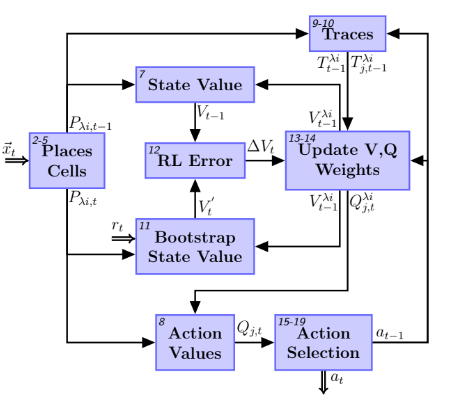

## Traduzindo Modelo  

In [ ]:


# Install dependencies
!pip install ratinabox gymnasium torch pettingzoo #dependencies

#Import ratinabox
import ratinabox
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
from ratinabox.Neurons import Neurons, GridCells, HeadDirectionCells, FeedForwardLayer, PlaceCells

#stylize plots and set figure directory for saving
ratinabox.stylize_plots(); ratinabox.autosave_plots=True; ratinabox.figure_directory="../figures/"

#...and other dependencies
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ratinabox.contribs.TaskEnvironment import (SpatialGoalEnvironment, SpatialGoal, Reward)
import torch
import torch.nn as nn
import random

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 847.8/847.8 kB 37.5 MB/s eta 0:00:00


In [ ]:
#!pip install latexify-py

#import latexify

### Literal Implementation

In [ ]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference

In [ ]:




DT = 0.1 # Time step
T_TIMEOUT = 15 # Time out
GOAL_POS = np.array([0.5, 0.5]) # Goal position
WALL = None
GOAL_RADIUS = 0.1
REWARD = 1 # Reward
REWARD_DURATION = 1 # Reward duration

#LEARNING CONSTANTS
TAU = 5 # Discount time horizon
TAU_E = 5 # Eligibility trace time horizon
ETA = 0.01 # Learning rate
N_EPISODES = 5000 # Number of episodes
L2 = 0.000 # L2 regularization


Abaixo temos a forma que o modelo do artigo calcula a firing rate de uma place cell de uma certa camada.

A classe PlaceCells tem várias opções de equações que podem ser usadas, pelo parametro "description". As opções são: gaussian (default), gaussian_threshold, diff_of_gaussians, top_hat e one_hot. As opções gaussianas são similares, porém não identicas. Por esta razão, foi feita uma classe a parte, "GaussianRadialBasisPlaceCells". Uma opção alternativa para adicionar este modelo seria adicionar uma nova opção de "description" para a classe original.

In [ ]:

import math
from ratinabox.Neurons import PlaceCells
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle


class GaussianRadialBasisPlaceCells(PlaceCells):
  default_params = dict()

  # based on the original place cells firing rate function of the package,
  # but using the equation in the article
  def get_state(self, evaluate_at='agent', **kwargs):

        if evaluate_at == "agent":
            pos = self.Agent.pos
        elif evaluate_at == "all":
            pos = self.Agent.Environment.flattened_discrete_coords
        else:
            pos = kwargs["pos"]
        pos = np.array(pos)

        dist = (
            self.Agent.Environment.get_distances_between___accounting_for_environment(
                self.place_cell_centres, pos, wall_geometry=self.wall_geometry
            )
        )
        widths = np.expand_dims(self.place_cell_widths, axis=-1)

        activation_in_border = 0.2

        firingrate = np.exp((((dist) / (widths))** 2) * np.log(activation_in_border))

        if pos.shape == (2,):
          # Guarantee higher distances will be accounted as 0
          for i, d in enumerate(dist):
              if d > widths[i]:
                  firingrate[i] = 0

        firingrate = (
            firingrate * (self.max_fr - self.min_fr) + self.min_fr
        )

        return firingrate

  def plot_place_cell_locations(
          self,
          fig=None,
          ax=None,
          autosave=None,
          show_widths=False
      ):
      """Scatter plots where the centre of the place cells are, with optional circles around each place cell center.

      Args:
          fig, ax: if provided, will plot fig and ax onto these instead of making new.
          autosave (bool, optional): if True, will try to save the figure into `ratinabox.figure_directory`. Defaults to None in which case looks for global constant ratinabox.autosave_plots

      Returns:
          fig, ax: The figure and axis after plotting.
      """
      if fig is None and ax is None:
          fig, ax = self.Agent.Environment.plot_environment(autosave=False)
      else:
          _, _ = self.Agent.Environment.plot_environment(
              fig=fig, ax=ax, autosave=False
          )

      place_cell_centres = self.place_cell_centres
      x = place_cell_centres[:, 0]

      if self.Agent.Environment.dimensionality == "1D":
          y = np.zeros_like(x)
      elif self.Agent.Environment.dimensionality == "2D":
          y = place_cell_centres[:, 1]

      # Plot the scatter points (place cell centers)
      ax.scatter(
          x,
          y,
          c="C1",  # Color of the scatter points
          marker="x",  # Marker style
          s=15,  # Marker size
          zorder=2,
      )

      # Add circles around each place cell center
      if show_widths:

        for i in range(len(x)):
          radius = self.params['widths'][i]
          xc = x[i]
          yc = y[i]
          circle = Circle(
                (xc, yc),  # Center of the circle (x, y)
                radius,  # Radius of the circle
                edgecolor="C1",  # Circle border color
                facecolor="none",  # Make the circle transparent inside
                lw=2,  # Line width of the circle
                zorder=1,  # Ensure circles are drawn below the scatter points
          )
          ax.add_patch(circle)

      # Save the figure if autosave is True
      ratinabox.utils.save_figure(fig, "place_cell_locations_with_circles", save=autosave)

      return fig, ax


In [ ]:
class ActionSelection():
    def __init__(self, speed=0.2, use_bias=True):



        self.speed = speed
        self.action_values = None  # has all action values of all cells of all layers
        self.last_action_taken = None
        self.use_affordances = False
        self.trial_bias = []


        # The closer to 0, the less bias
        # The second article (continuation of the original) defined it as 2^-1/50, which is roughly 0.9862322
        self.base_decay = 0.98
        self.last_action_probabilities = None

        self.last_actions = [] # will hold up to self.repetitions+1 last actions



        # CUSTOM VARIABLES (possibly remove some of them before final release, to make the code cleaner)
        self.use_bias = True#use_bias  # Determines if bias should be applied
        # repetitions was made to test the expected behavior of calling action selection
        # multiple times for the same inputs
        self.repetitions = 0 # keep it as 0 for article behaviour

        # Epsilon-Greedy constant:
        # it randomly determines if the action will be picked based on
        # probability distribution, or by picking the highest possible option everytime (greedy)
        self.greedy_chance = 0 # keep it as 0 for article behaviour, 1 for complete greedy, any number in between for epsilon-greedy

        self.use_probabilities_as_weights = False # instead of choosing a single action, an action becomes a sum of all actions,
        # with the proability being used as a weight. Keep it as False for article behaviour.



    # The forward function receives new input, which in the article is
    # a vector calculated from eligibility traces.
    def forward(self, action_values):
        # Convert input list to a tensor if it's a list
        if isinstance(action_values, list):
            action_values = torch.tensor(action_values, dtype=torch.float32).unsqueeze(0)  # Add batch dimension

        # Apply softmax to obtain probabilities
        action_values_tensor = torch.softmax(action_values, dim=1)

        # Convert the result back to a list
        self.action_values = action_values_tensor.squeeze(0).tolist()  # Remove batch dimension and convert to list

    def reset_actions(self):
        self.last_actions = []
        self.last_action_taken = None

    def last_action_was_optimal(self):
        if self.last_action_taken is None:
            return False
        return self.last_action_taken == torch.argmax(torch.tensor(self.action_values))

    def _chooose_action_from_probabilities(self, probabitilies):

        use_greedy_choice = random.random() < self.greedy_chance

        if use_greedy_choice:
            return torch.argmax(torch.tensor(probabitilies))
        dist = torch.distributions.Categorical(torch.tensor(probabitilies))
        choice = dist.sample()
        return choice

    def sample_action(self, trial_number, impossible_actions):


        probabilities = []

        for i in range(8):
            probabilities.append(self.action_values[i] * self.get_bias(i))

        sum_of_values = np.sum(np.array(probabilities))

        if sum_of_values == 0:
            # Eq. 16 when the sum of probabilities is zero
            probabilities = [1/8 for i in range(8)]
        else:
            # Eq. 16 when the sum of probabilities is not zero
            probabilities = [i / sum_of_values for i in probabilities]

        self.last_action_probabilities = probabilities

        # instead of probabilistic, it uses the probabilities as weights
        if self.use_probabilities_as_weights:

          final_vector = np.array([0.0,0.0])

          for i in range(8):

            vector = self.get_action_vector(i)
            final_vector += probabilities[i] * vector

          return final_vector, None

        choice = self._chooose_action_from_probabilities(probabilities)

        action = self.get_action_vector(choice.item())
        self.last_action_taken = choice.item()
        self.last_actions.append(choice.item())
        if len(self.last_actions) > self.repetitions+1:
          self.last_actions.pop(0)
        return action, choice



        '''decay = self.base_decay ** trial_number

        action_possibility_vector = np.array([0 if a else 1 for a in impossible_actions])
        if self.use_affordances == False:
            action_possibility_vector = np.array([1  for a in impossible_actions])
        sum_possible_actions = np.sum(action_possibility_vector)

        probabilities = []

        for i in range(8):
            probabilities.append(action_possibility_vector[i] * self.action_values[i])

        sum_of_values = np.sum(np.array(probabilities))

        if sum_of_values == 0:
            # Eq. 16 when the sum of probabilities is zero
            probabilities = [action_possibility_vector[i] / sum_possible_actions for i in range(8)]
        else:
            # Eq. 16 when the sum of probabilities is not zero
            probabilities = [i / sum_of_values for i in probabilities]

        weights = []

        for i in range(8):
            # Eq. 18, apply bias only if use_bias is True
            if self.use_bias:
                weight = decay * self.get_bias(i) + (1 - decay) / 8
            else:
                weight = (1 - decay) / 8  # No bias, equal weight
            weights.append(weight)

        # Eq. 19
        probabilities = [weights[i] * probabilities[i] for i in range(8)]
        sum_of_values = np.sum(np.array(probabilities))
        probabilities = [i / sum_of_values for i in probabilities]

        dist = torch.distributions.Categorical(torch.tensor(probabilities))
        choice = dist.sample()

        action = self.get_action_vector(choice.item())
        self.last_action_taken = choice
        return action, choice'''

    def get_action_vector(self, choice):
        # Eq. 1
        theta = choice * (np.pi / 4)
        action = self.speed * np.array([np.cos(theta), np.sin(theta)])
        return action


    def set_trial_bias(self, trial_number):

      fixed_bias = [0.83, 0.06, 0.01, 0.01, 0.01, 0.01, 0.01, 0.06]
      #fixed_bias = [0.83, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
      trial_bias = []
      for i in range(8):

        new_bias = (self.base_decay**trial_number)*(fixed_bias[i] - 1/8) + 1/8
        trial_bias.append(new_bias)

      self.trial_bias = trial_bias

    def get_bias(self, action_index):
        #fixed_bias = [0.83, 0.06, 0.01, 0.01, 0.01, 0.01, 0.01, 0.06]
        # Eq. 17
        bias_to_use = (action_index - (self.last_action_taken if self.last_action_taken is not None else 0)) % 8
        return self.trial_bias[bias_to_use]
        return fixed_bias[bias_to_use]


In [ ]:




import random
from ratinabox.contribs.TaskEnvironment import (SpatialGoalEnvironment, SpatialGoal, Reward)
#import constants as constants
from ratinabox.Environment import Environment
import numpy as np


def create_environment(initial_x, final_x, initial_y, final_y, goals, teleport_on_reset=False, show_rewards_as_objects=False ):

    Env = SpatialGoalEnvironment(
        dt=DT,
        teleport_on_reset=teleport_on_reset,
        episode_terminate_delay=REWARD_DURATION,
        params={
            'boundary':[
        [initial_x,initial_y ],  [final_x,initial_y ],  [final_x,final_y ],  [initial_x,final_y ],
        ]
        }
    )
    Env.exploration_strength = 1
    #if WALL is not None: env.add_wall(WALL)
    reward = Reward(REWARD,decay="none",expire_clock=None,dt=DT,)

    goal_instances = [

        SpatialGoal(Env,pos=goal[0],goal_radius=goal[1], reward=reward) for goal in goals]
    Env.goal_cache.reset_goals = goal_instances


    #illustrative_starting_positions = generate_random_positions(10, initial_x, initial_y, final_x, final_y)
    #for position in illustrative_starting_positions:
    #  Env.add_object(object=position,type=0)


    if show_rewards_as_objects:
      for goal in goals:
        Env.add_object(object=goal[0],type=0)

    #Make the reward which is given when a spatial goal is satisfied. Attached this goal to the environment
    #reward_positions = generate_random_positions(5)
    #goals = []
    #for position in reward_positions:
    #  reward = Reward(REWARD,decay="none",expire_clock=REWARD_DURATION,dt=DT,)
    #  goals.append(SpatialGoal(Env,pos=np.array(position), goal_radius=GOAL_RADIUS, reward=reward))
    #Env.goal_cache.reset_goals = goals
    #Env.plot_environment()
    return Env

def generate_random_positions(n, initial_x, initial_y, final_x, final_y):

  starting_positions = [

  ]

  while len(starting_positions) < n:

    starting_y = random.uniform(initial_y, final_y)
    starting_x = random.uniform(initial_x, final_x)
    position = [starting_x, starting_y]
    if position in starting_positions:
      continue # Ignore similar positions
    starting_positions.append(position)

  return starting_positions



In [ ]:

def can_move_check(agent_position, movement, env: Environment):
    # Calculate the next position based on the movement vector
    next_position = agent_position + np.array(movement)

    # Create the proposed step array
    proposed_step = np.array([agent_position, next_position])

    # Check for wall collisions
    _, collision_flags = env.check_wall_collisions(proposed_step)

    # If any collision flag is True, the movement is not possible
    return not any(collision_flags)


def xavier_initialization(n_in, n_out, uniform=True):
    if uniform:
        limit = np.sqrt(6 / (n_in + n_out))
        return np.random.uniform(-limit, limit, (n_in, n_out))
    else:
        stddev = np.sqrt(2 / (n_in + n_out))
        return np.random.normal(0, stddev, (n_in, n_out))


# last tried decays: 0.5 (too small), 0.8
# the higher the value, the more relevance to previous actions
# continuation article: uses 0.7
trace_decay = 0.7

# Class created to contain all information and logic related to
# the manipulation of a single layer of place cells
# It was made as a base class and not a Neuron, because its not supposed to be used as a neuron and
# any neuron can be used with it
class NeuralLayer:



  def __init__(self, place_cells, rows):

    self.place_cells = place_cells
    self.rows = rows
    self.number_of_cells = len(self.place_cells.firingrate)
    self.traces = [0 for i in range(self.number_of_cells)] # each cell has a trace, which has to start as 0 in t=0
    self.action_traces = [[0 for i in range(8)] for i in range(self.number_of_cells)] # each cell has 8 action traces

    self.learning_rate = 0.4 # the article defined as 0.6, second article defined as 0.4

    # base weights for all the cells
    # it will start as 1, arbitrarily, for all of them
    # the weights will be updated with RL untill optimal
    self.weights_for_state = xavier_initialization(self.number_of_cells, self.number_of_cells)#[0 for i in range(self.number_of_cells)] # Vi is a weight associated with cell i
    self.weights_for_action = xavier_initialization(self.number_of_cells, 8)#[[0 for i in range(8)] for i in range(self.number_of_cells)] # Qi is a weight associated with cell i and action j

    # Defined in continuation article
    self.cell_counters = [0 for i in range(self.number_of_cells)] # used to count how many iterations the firing rate was zero (used to reset traces to zero)

    # the path matrix determines the most often used combination of firing (if cell j fired right after i, the connection i,j will be stronger)
    # another way to visualize is to see this as the connection strength between different cells (and therefore, the bonding of their correlation properties)
    # it is known that cells may have thousands of connections with different cells. Moveover, this path matrix can also be understood as an expectation
    # set by the brain. Such as, given state i, a state j is expected to happen, either due to j being a relevant stimuli, or being part of a chain that
    # leads to relevant stimuli (which in the brain would make that particular cell firing release dopamine or other neurotransmitters)
    # in the article, the firing rates are averaged from time t and time t+1 in order to build the connection
    # in neuroscience, there is the popular saying "cells that fire together wire together". Since the place cells modeled fire with almost exclusive behaviour,
    # its necessary to look at previous states instead of current ones.
    self.path_matrix = [[1 if i == j else 0 for i in range(self.number_of_cells)] for j in range(self.number_of_cells)] # from third article

    self.previous_firing_rates = [0 for i in range(self.number_of_cells)] # necessary for path matrix calculation

    normalized_firingrate = None

    self.max_counter_state_value = np.log(0.0001)/np.log(trace_decay)
    self.max_counter_action_value = self.max_counter_state_value


    # CUSTOM VARIABLES
    # when calculating the bootstrap, it uses the path matrix instead of the actual firing rates
    # this is a test to check if having a lasting firing rate changes some metrics
    self.use_path_matrix_for_bootstrap = False # set as False for article results
    self.should_update_path_matrix = False # in case i want to disable it entirely, set as False for first and second article behavior
    self.rates_of_path_matrix = None
    self.have_cell_counters = True # True for article-2 behaviour, False for article-1 behavior


  # Essencially what sets the normalized firing rates to follow
  # Eq. 6
  def update_normalized_firingrate(self, sum_of_rates):

    if self.use_path_matrix_for_bootstrap:
      #print("sum of rates", sum_of_rates)
      #print("for n cells", len(self.rates_of_path_matrix))
      self.normalized_firingrate = self.rates_of_path_matrix / sum_of_rates
    else:
      self.normalized_firingrate = self.place_cells.firingrate / sum_of_rates

  # Used to test what happens when weights are inverted at the end of a trial (alternative behavior)
  def invert_weights(self):
      max_weight = np.max(self.weights_for_state)
      min_weight = np.min(self.weights_for_state)
      self.weights_for_state = [(max_weight + min_weight - i) for i in self.weights_for_state]

      max_action_weight = np.max([max(row) for row in self.weights_for_action])
      min_action_weight = np.min([min(row) for row in self.weights_for_action])
      self.weights_for_action = [
          [(max_action_weight + min_action_weight - j) for j in i]
          for i in self.weights_for_action
      ]

  def update(self):
    self.previous_firing_rates = self.place_cells.firingrate.copy()

    self.place_cells.update()

    if self.have_cell_counters:
      for firing_rate in self.place_cells.firingrate:
        if firing_rate == 0:
          self.cell_counters[self.place_cells.firingrate.index(firing_rate)] += 1
        else:
          self.cell_counters[self.place_cells.firingrate.index(firing_rate)] = 0


  def _calculate_firing_connection_of_cells(self, current_connection, previous_firing_rate_i,current_firing_rate_i, j):

    previous_firing_rate_j = self.previous_firing_rates[j]

    current_firing_rate_j = self.place_cells.firingrate[j]

    firing_average =  ((current_firing_rate_i + previous_firing_rate_i)/2) * (current_firing_rate_j - previous_firing_rate_j)

    new_connection = current_connection + math.atan(firing_average)
    return max(new_connection, 0) # make sure connections cant be negative


  # Updates the path matrix to consider the new firing rates
  # (ps: check if this can be optimized (I imagine it can))
  def update_path_matrix(self):

    if not self.should_update_path_matrix:
      return

    for i in range(self.number_of_cells):

      previous_firing_rate_i = self.previous_firing_rates[i]
      current_firing_rate_i = self.place_cells.firingrate[i]

      if previous_firing_rate_i + current_firing_rate_i == 0:
        continue
      for j in range(self.number_of_cells):

        if i == j:
          self.path_matrix[i][j] = 1
          continue
        is_connectable = 1 # in the article, this is set to 0 if there is a wall between the cells

        current_connection = self.path_matrix[i][j]
        new_connection = self._calculate_firing_connection_of_cells(current_connection, previous_firing_rate_i,current_firing_rate_i,j)

        new_connection *= is_connectable

        self.path_matrix[i][j] = new_connection

    self.get_rates_from_path_matrix()


  # custom
  def get_rates_from_path_matrix(self):

    new_firing_rate = []

    for i in range(self.number_of_cells):
      new_firing_rate.append(np.sum(self.place_cells.firingrate * self.path_matrix[i]))

    self.rates_of_path_matrix = new_firing_rate
    return new_firing_rate

  def calculate_propagated_firing_rate_with_path_matrix(self, active_cell_index, active_cell_rate, propagation_threshold):
    pass


  # Returns the connections of cell i. If the threshold provided is higher than the connection,
  # that connection counts as zero
  def get_connections_for_cell(self, cell_index, threshold):
    connections = []

    for connection, j in enumerate(self.path_matrix[cell_index]):
      if connection > threshold and cell_index != j:
        connections.append(connection)
      else:
        connections.append(0)

    return connections

  def compute_next_expected_cell_from_connection(self, cell_index):

    connections = self.get_connections_for_cell(cell_index, threshold)

    connections = softmax(connections)



  def reset_traces(self):
    self.traces = [0 for i in range(self.number_of_cells)]
    self.action_traces = [[0 for i in range(8)] for i in range(self.number_of_cells)]

  def get_layer_size(self):
    return self.number_of_cells#len(self.place_cells.firingrate)

  # Eq. 7
  # Could be implemented by a Feed Forward Network
  def compute_state_value(self):
        firing_rates = self.normalized_firingrate
        state_values = np.sum(np.multiply(self.weights_for_state, firing_rates))
        return state_values

  # Eq. 8
  # Could be implemented by a Feed Forward Network
  def compute_action_values(self):

        firing_rates = np.array(self.normalized_firingrate)
        return np.sum(self.weights_for_action * firing_rates[:, None], axis=0)
        action_value_of_actions = []

        for j in range(8):
            action_value_mult = np.array([])
            for i in range(len(firing_rates)):
                weighted_rate = self.weights_for_action[i][j] * firing_rates[i]
                action_value_mult = np.append(action_value_mult, weighted_rate)
            action_value_of_actions.append(np.sum(action_value_mult))

        return action_value_of_actions

  # In first article, Eq. 9
  # Consdering the second article, it uses the counter
  def _update_eligibility_trace_of_cell(self, trace, firing_rate, cell_index):

        if self.cell_counters[cell_index] >= self.max_counter_state_value:
          return  0

        trace_calculated = max(trace_decay * trace, firing_rate)
        return trace_calculated

  # In first article, Eq. 10
  def _update_eligibility_trace_of_cell_action(self, trace_actions, firing_rate, action_taken_index, cell_index, action_probabilities):

        if self.cell_counters[cell_index] >= self.max_counter_action_value:
          return  [0 for i in range(8)]

        action_traces = []
        for i in range(8):
            delta = 1 if i == action_taken_index else 0
            #action_traces.append(max(trace_decay * trace_actions[i], delta * firing_rate))
            action_traces.append(trace_decay * trace_actions[i] + (delta - action_probabilities[i]) * firing_rate)
        return action_traces

  # Part of eq. 11
  def compute_bootstrap_partsum(self):
        firing_rates = self.normalized_firingrate
        discount = 0.95 # first article defined as 0.999, second as 0.95
        return np.sum(np.multiply(np.multiply(self.weights_for_state, firing_rates), discount))
        #new_error = reward + np.sum(np.multiply(np.multiply(self.weights_for_state, firing_rates), discount))
        #for i in range(len(firing_rates)):
        #    new_error += discount * self.weights_for_state[i] * firing_rates[i]
        #return new_error

  def update_weights(self, error, layer_has_optimal_action, action_selected):
    self.weights_for_state, self.weights_for_action = self._update_weights(error, layer_has_optimal_action, action_selected)

  def update_traces(self, action_index, action_probabilities):
        self.traces, self.action_traces = self._get_updated_traces(action_index, action_probabilities)

  def _get_updated_traces(self, action_taken_index, action_probabilities):

    firing_rates = self.normalized_firingrate
    updated_traces = self.traces.copy()
    updated_action_traces = self.action_traces.copy()

    for i in range(len(firing_rates)):
      updated_traces[i] = self._update_eligibility_trace_of_cell(updated_traces[i], firing_rates[i], i)

    for i in range(len(firing_rates)):
      updated_action_traces[i] = self._update_eligibility_trace_of_cell_action(updated_action_traces[i], firing_rates[i],
                                                                               action_taken_index, i, action_probabilities)

    return updated_traces, updated_action_traces


  def get_action_index_of_highest_action_weight(self):
    return  np.argmax(self.weights_for_action)
    #action_weight_sums = self._get_action_weight_sums()
    #highest_index = np.argmax(action_weight_sums)
    #return highest_index

  # unused
  # TODO: check if there is an optimization of this operation
  def get_action_index_and_value_of_highest_action_weight(self):
    highest_index = self.get_action_index_of_highest_action_weight()

    highest_weight = 0

    try:
      for i in range(len(self.weights_for_action)):
        if self.weights_for_action[i][highest_index] > highest_weight:
          highest_weight = self.weights_for_action[i][highest_index]
    except:
      print(f"error getting highest action weight, with index {highest_index}")
      raise Exception("Error in get_action_index_and_value_of_highest_action_weight")
    return highest_index, highest_weight

  def _get_action_weight_sums(self):
    weights = self.weights_for_action

    return np.sum(weights, axis=0)


  # Eq. 13 and Eq. 14
  def _update_weights(self, new_error, layer_has_optimal_action, action_selected):
        new_weight_for_state = []
        new_weight_for_action = []

        for i in range(len(self.weights_for_state)):
            new_action_weights = self._get_new_action_weights_of_cell(i, new_error)
            new_weight_for_action.append(new_action_weights)

            highest_index = np.argmax(new_action_weights)

            #
            has_optimal_action = layer_has_optimal_action or highest_index == action_selected

            if has_optimal_action:
              new_weight_for_state.append(self._get_new_state_weight_of_cell(i, new_error))
            else:
              new_weight_for_state.append(self.weights_for_state[i])



        #if not layer_has_optimal_action:
        #  new_weight_for_state = self.weights_for_state

        return new_weight_for_state, new_weight_for_action

  # In first article, the original Eq. 13 for cell i = cell_index
  def _get_new_state_weight_of_cell(self, cell_index, error):


    trace = self.traces[cell_index]
    new_state_weight = self.weights_for_state[cell_index] + (error * self.learning_rate * trace)
    return new_state_weight

  # Eq. 14 for cell i = cell_index
  def _get_new_action_weights_of_cell(self, cell_index, error):
    weights_for_cell_actions = []
    for j in range(len(self.weights_for_action[cell_index])):
      weight = self.weights_for_action[cell_index][j] + self.action_traces[cell_index][j] * self.learning_rate * error
      weights_for_cell_actions.append(weight)

    return weights_for_cell_actions

In [ ]:
import numpy as np
#from action_selection import ActionSelection
#from environment import can_move

class NetworkComputations:

    def __init__(self, layers, speed) -> None:

        #self.place_cells = place_cells
        self.layers = layers
        self.number_of_cells = np.sum([layer.get_layer_size() for layer in layers])

        #self.number_of_cells = len(place_cells.firingrate)

        self.state_value = 0 # one value for all layers

        self.action_selection = ActionSelection(speed=speed)

        self.history = {}
        self.history["error"] = []
        self.history["was_optimal"] = []
        self.reward_history = []


    # Eq. 12
    def compute_rl_error(self, bootstrap):
      return bootstrap - self.state_value

    def get_impossible_actions(self, position, env):
      impossible_actions = []
      for i in range(8):
        test_action = self.action_selection.get_action_vector(i)
        can_move = can_move_check(position, test_action, env)
        impossible_actions.append(not can_move)
      return impossible_actions

    def invert_weights(self):

      for layer in self.layers:
        layer.invert_weights()
    def iterate(self, env, position, reward, t, trial_number, is_terminal_state, index_of_last_action):
        # Compute place cells (Pλi,t);
        # each layer needs to call update once
        sum_of_rates = 0
        for layer in self.layers:
          layer.place_cells.update()
          layer.update_path_matrix()
          sum_of_rates += np.sum(layer.rates_of_path_matrix if layer.use_path_matrix_for_bootstrap else layer.place_cells.firingrate)

        for layer in self.layers:
          layer.update_normalized_firingrate(sum_of_rates)

        # Custom implementation: pass reward to negative if last action
        # hitted wall
        if reward == 0:
          last_action = self.action_selection.last_action_taken

          if last_action != None:
            can_move = can_move_check(position, self.action_selection.get_action_vector(last_action), env)
            if can_move == False:
              self.iterate(env, position, -1, t, trial_number, is_terminal_state, index_of_last_action)
              reward = -1#0.5

        self.reward_history.append(reward)

        if t > 0:
            # Compute bootstrap V't;
            # Eq, 11
            # Each layer has its own sum of cellxweight
            bootstrap = reward

            # We only consider the bootstrap value of the layers if we have not achieved the goal yet (either reward is going to be zero or a negative value here)
            if not is_terminal_state:
              bootstrap += np.sum(np.array([layer.compute_bootstrap_partsum() for layer in self.layers]))

            # Compute RL Error (ΔVt);
            error = self.compute_rl_error(bootstrap)
            #self.history["error"].append(error)

            # Update V,Q weights (V λi t , Qλi jt);
            # Eq. 13 and Eq. 14
            # Should only happen if the last action was on-policy
            # In this case, if the last action is the one with
            # current highest action value, or when the error is positive
            #was_optimal = self.action_selection.last_action_was_optimal()
            #self.history["was_optimal"].append(was_optimal)
            #if was_optimal or error > 0:

            for action_considered in self.action_selection.last_actions[0:index_of_last_action+1]:

              ''' #
              highest_index, highest_weight = 0,0
              for layer in self.layers:
                i,w = layer.get_action_index_and_value_of_highest_action_weight()
                if w > highest_weight:
                  highest_weight = w
                  highest_index = i

              has_optimal_action = highest_index == action_considered or error > 0'''
              for layer in self.layers:

                  layer.update_weights(error, error > 0, action_considered)

        # Compute the state value (Vt);
        self.state_value = np.sum(np.array([layer.compute_state_value() for layer in self.layers]))
        # Compute the action values (Qj,t);

        all_actions_values = [layer.compute_action_values() for layer in self.layers]

        action_values = [0 for i in range(8)]
        for i in range(len(all_actions_values)):
          for j in range(len(action_values)):
            action_values[j] += all_actions_values[i][j]

        #action_values = np.array(action_values)

        # Perform action selection (at);
        self.action_selection.forward(action_values)


        for i in range(self.action_selection.repetitions + 1):
          action, action_index = self.action_selection.sample_action(trial_number, self.get_impossible_actions(position, env))

          # Update traces (T λi t , T λi jt);
          for layer in self.layers:
            layer.update_traces(action_index, self.action_selection.last_action_probabilities)

        # Perform action (at); -> done outside the iterate function
        return self.action_selection.last_actions

In [ ]:


class CellPopulator:

  # cell_constructor_function -> function that receives the agent and params map
  def __init__(self, agent, enviroment_size, cell_constructor_function):
    self.agent = agent
    self.enviroment_size = enviroment_size
    self.cell_constructor_function = cell_constructor_function

  # Based on eq. 2 and eq. 3
  def create_cells_from_width_and_columns(self, width_to_use, columns):

    rows = int(columns * (self.enviroment_size[1]/self.enviroment_size[0]))

    n = rows * columns
    d = (self.enviroment_size[0] + 2 * width_to_use)/(columns + 1)

    cell_centers = []

    for i in range(n):
      x = d * ((i % columns) + 1)
      y = d * ((i // columns) + 1)
      x -= width_to_use #+ self.enviroment_size[0]/2
      y -= width_to_use #+ self.enviroment_size[1]/2
      cell_centers.append(np.array([x,y]))

    return self.cell_constructor_function(self.agent,
        params={
            "place_cell_centres": np.array(cell_centers),
            "widths": [width_to_use for i in range(len(cell_centers))],
    },)

  # Needs to have the total number of cells for the whole environment
  def create_cells_from_width_and_ammount(self, width_to_use, number_of_cells):
    cell_widths =  [width_to_use for i in range(number_of_cells)]#np.random.uniform(0.1, 0.4, size=(number_of_cells))

    cell_centers = []

    x = 0.1
    y = 0.1
    for cell_width in cell_widths:

      cell_centers.append(np.array([x,y]))

      if x > self.enviroment_size[0]-0.1:
        x = 0.1
        y += cell_width
      else:
        x += cell_width


    return self.cell_constructor_function(self.agent,
        params={
            "place_cell_centres": np.array(cell_centers),
            "widths": cell_widths,
    },)





In [ ]:


def display_reward_patch(fig, ax, reward_pos=GOAL_POS, reward_radius=GOAL_RADIUS, **kwargs): #we'll also use this later
    """Plots the reward patch on the given axis"""
    circle = matplotlib.patches.Circle(reward_pos, radius=reward_radius,
                                       facecolor='r', alpha=0.2, color=None)
    ax.add_patch(circle)
    return fig, ax

def display_reward_history(agent, rewards):
  fig, ax = plt.subplots(figsize=(4,1))
  ax.plot(agent.history["t"][0:len(rewards)],rewards)
  ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
  if len(rewards) > 0:
    ax.set_ylim(0,max(rewards)+0.1)
  ax.set_title("Reward rate")


def display_agent_series(agent, random_goal_positions, reward_radius=0.2, rewards=None):

  if len(agent.history['pos']) == 0 or len(agent.history['head_direction']) == 0 or len(agent.history['t']) == 0:
    return

  try:

    fig, ax = agent.plot_trajectory(color="changing")
  except:
    print("didnt plot trajectory")
    return

  try:
    for goal in random_goal_positions:
      fig, ax = display_reward_patch(fig,ax, reward_pos = goal, reward_radius=reward_radius)

    if rewards != None:
      display_reward_history(agent, rewards)
  except:
    pass

  return fig, ax


In [ ]:

trial_controller = TrialController(4, 3)
trial_controller.start_trial()



#trial_controller.run_trials_with_config(1, 1, 1000)
#

Creating layer  (0.05, 32)
Creating layer  (0.12, 20)


In [ ]:
trial_controller.set_goal_radius(0.2)
#trial_controller.set_trials_radius(0.1, -0.01)

Figure saved to /figures/24_12_20/Environment_1755.png  & .svg


(<Figure size 1100x1500 with 1 Axes>, <Axes: >)

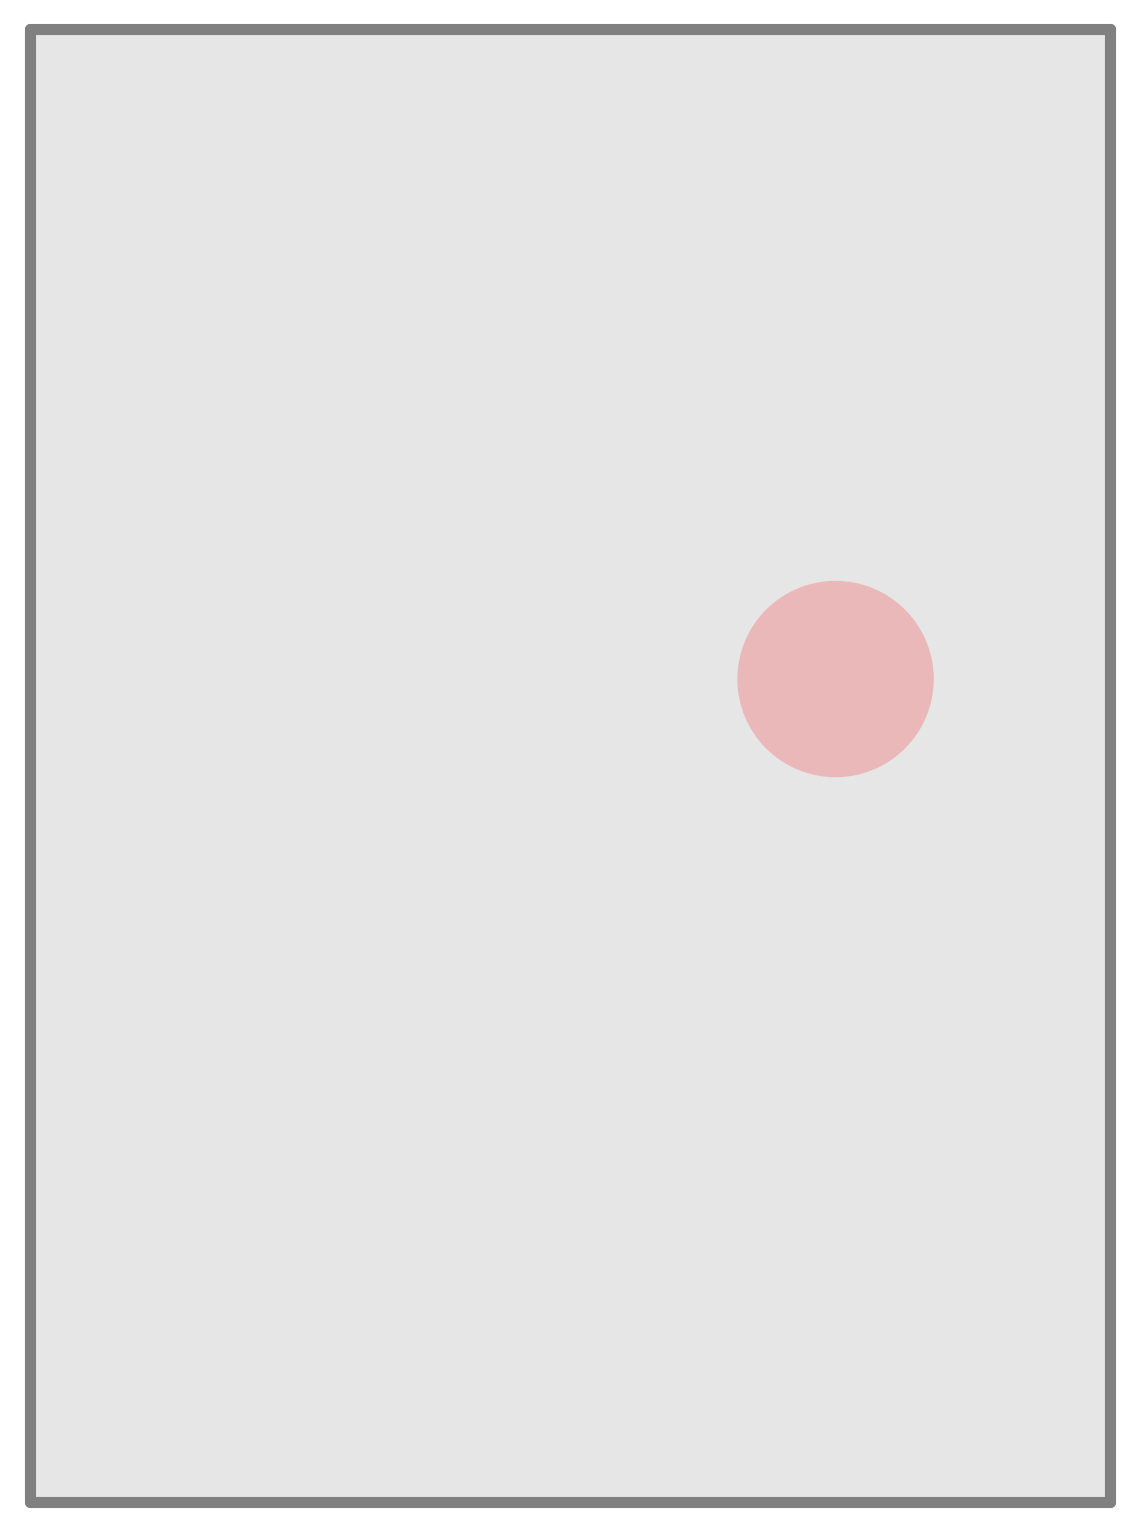

In [ ]:
fig, ax = trial_controller.env.plot_environment()
display_reward_patch(fig,ax, reward_pos =trial_controller.random_goal_positions[0],
                     reward_radius=0.2)

Running trial: 0
Suceeded? False
Time Taken for iteration: 311441
Figure saved to /figures/24_12_20/trajectory_1803.png  & .svg
Running trial: 1
Suceeded? True
Time Taken for iteration: 6842
Figure saved to /figures/24_12_20/trajectory_1803_1.png  & .svg
Running trial: 2
Suceeded? False
Time Taken for iteration: 304837
Figure saved to /figures/24_12_20/trajectory_1808.png  & .svg
Running trial: 3
Suceeded? True
Time Taken for iteration: 7517
Figure saved to /figures/24_12_20/trajectory_1808_1.png  & .svg
Running trial: 4
Suceeded? False
Time Taken for iteration: 299067
Figure saved to /figures/24_12_20/trajectory_1813.png  & .svg
Running trial: 5
Suceeded? False
Time Taken for iteration: 325128
Figure saved to /figures/24_12_20/trajectory_1818.png  & .svg


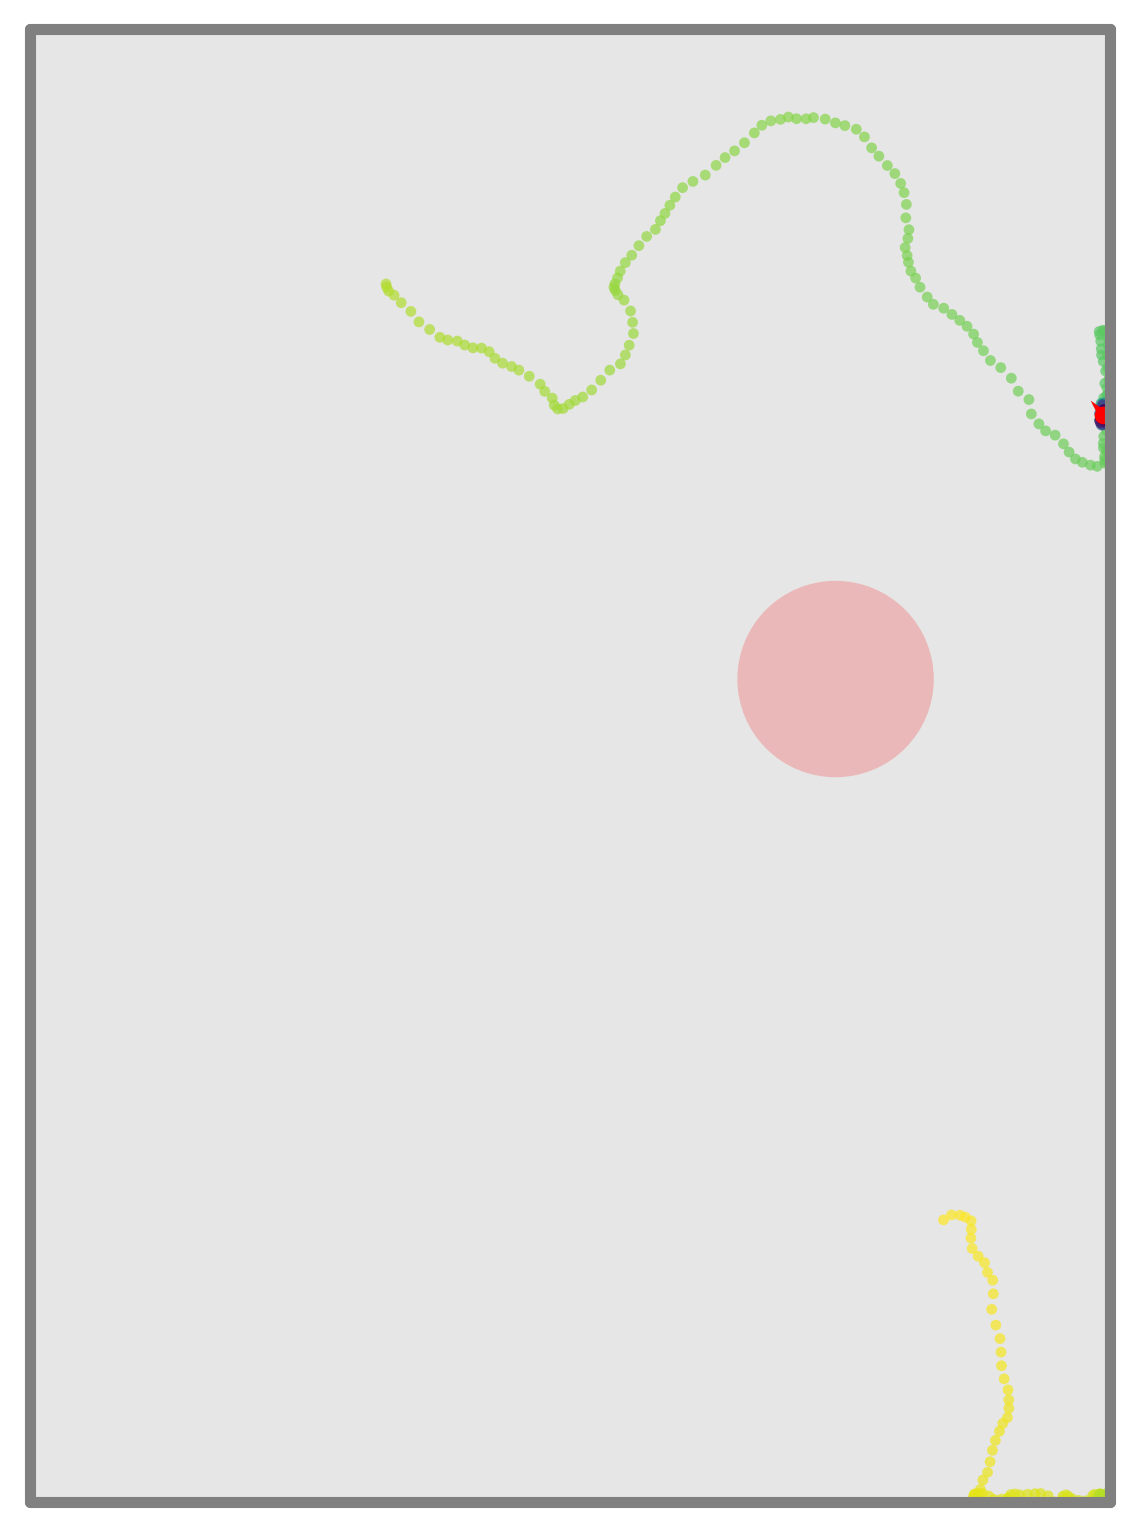

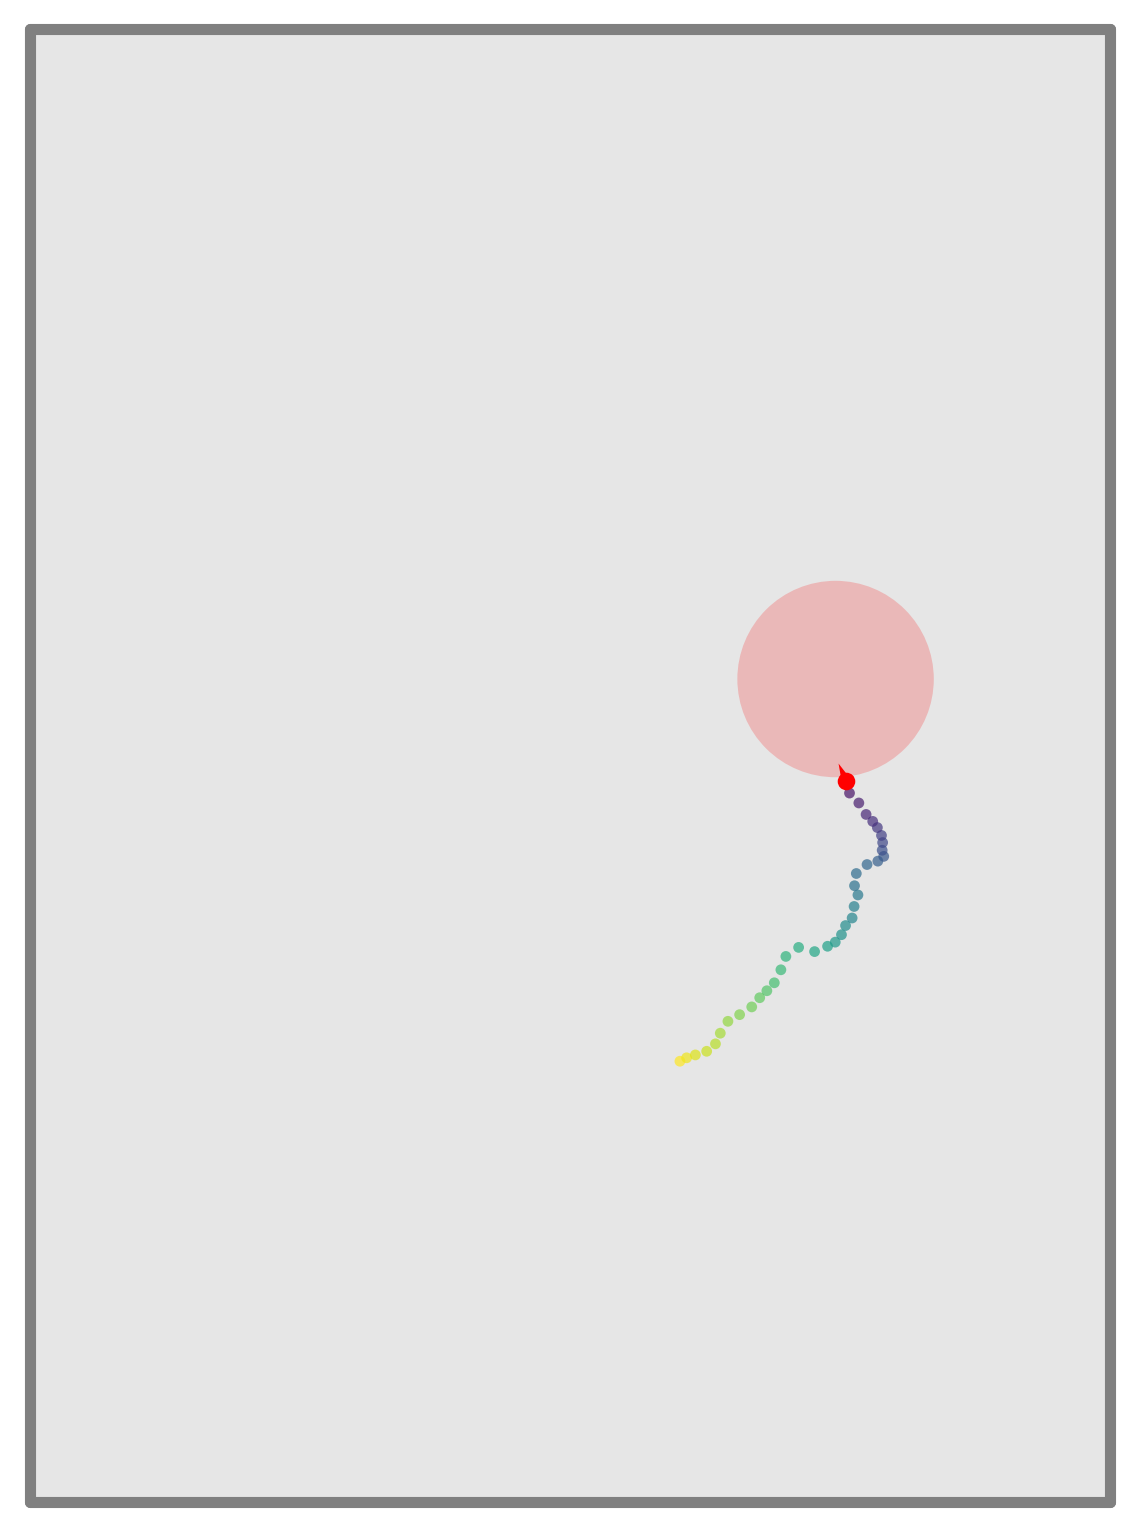

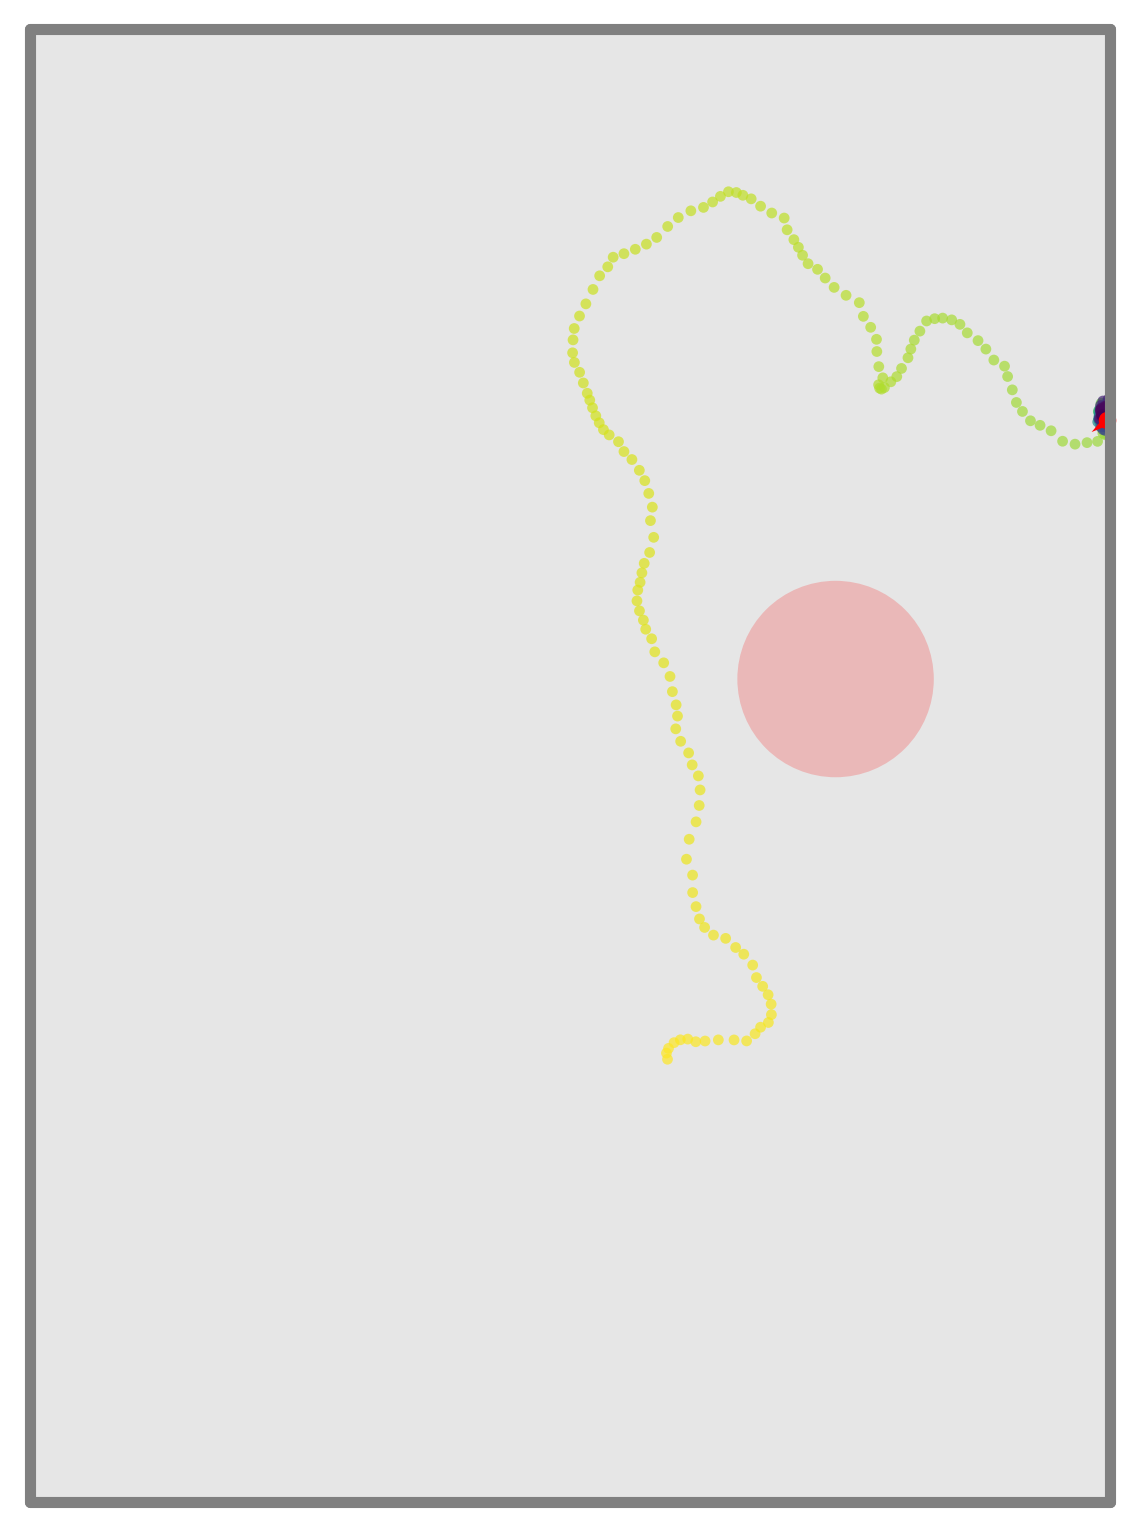

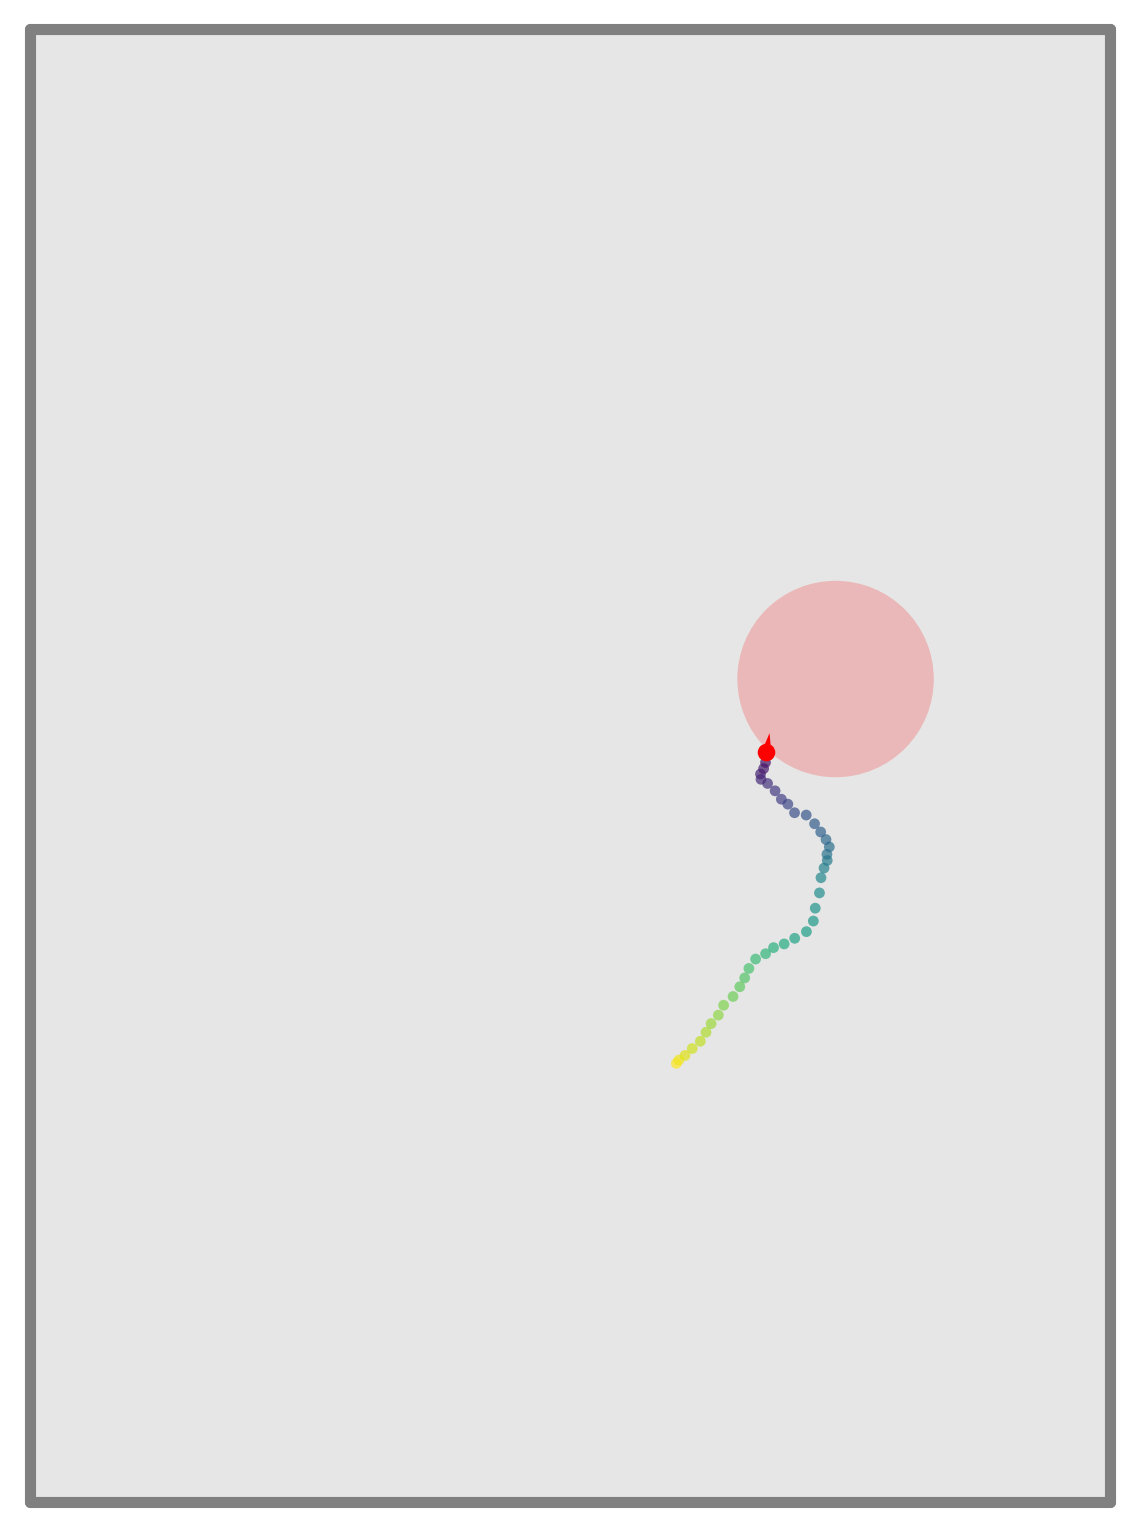

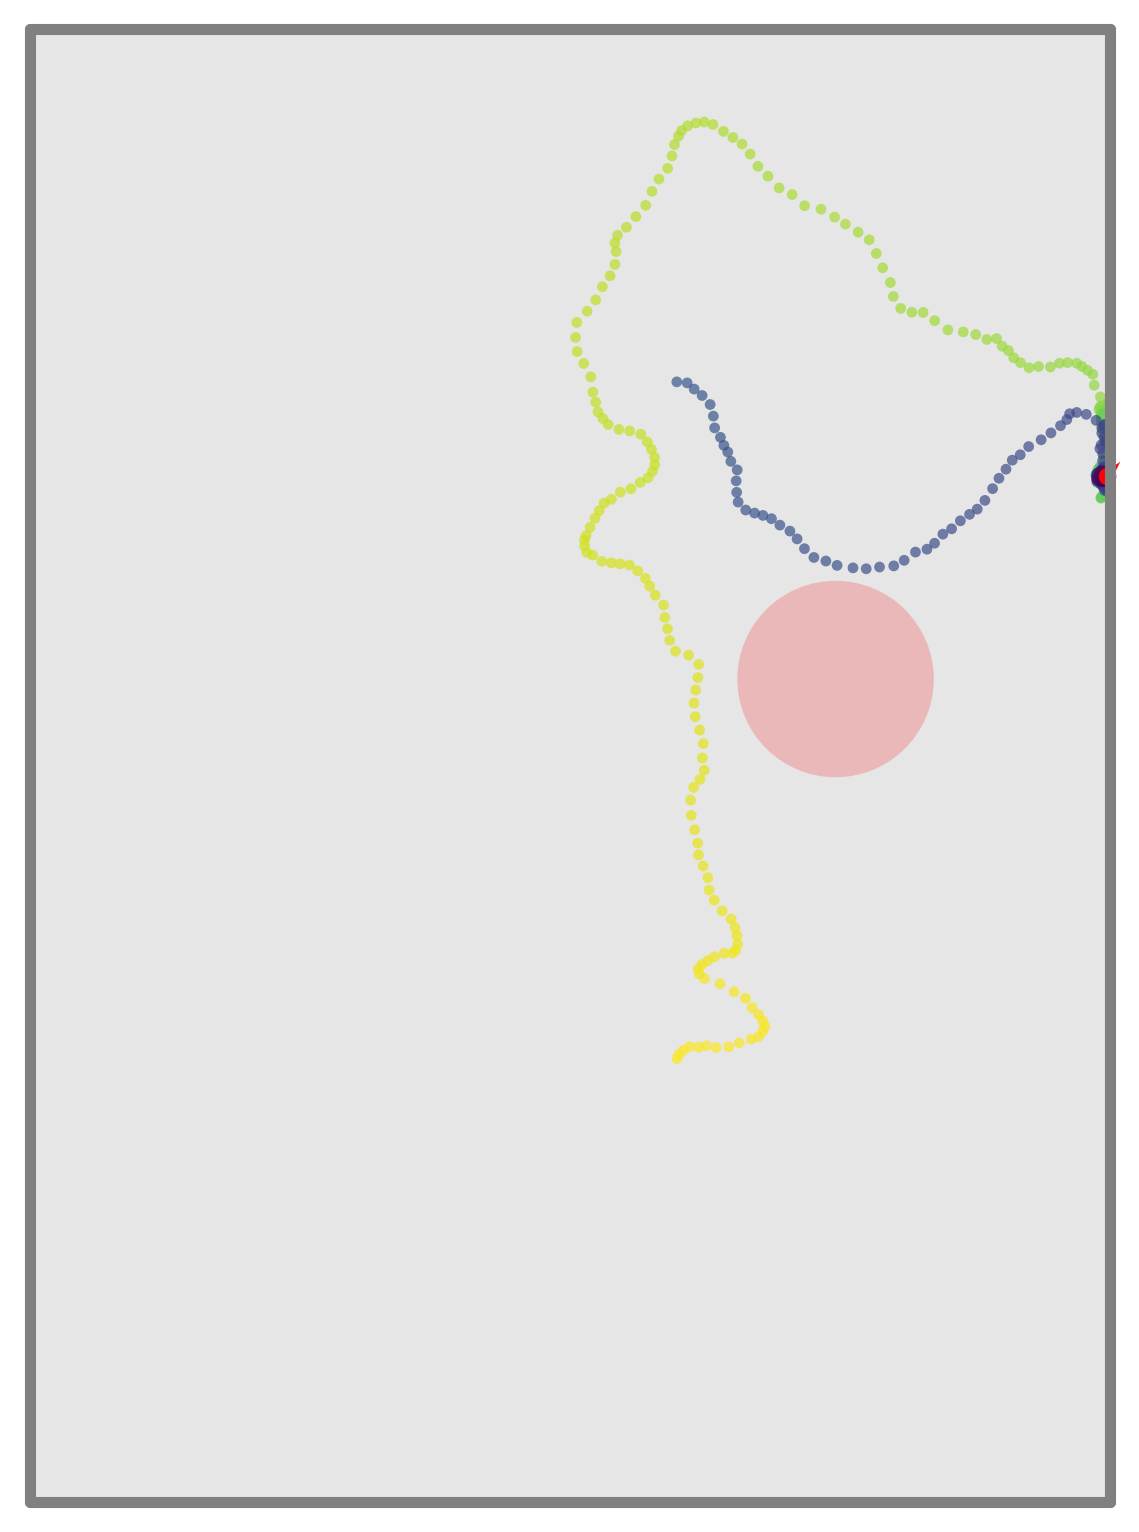

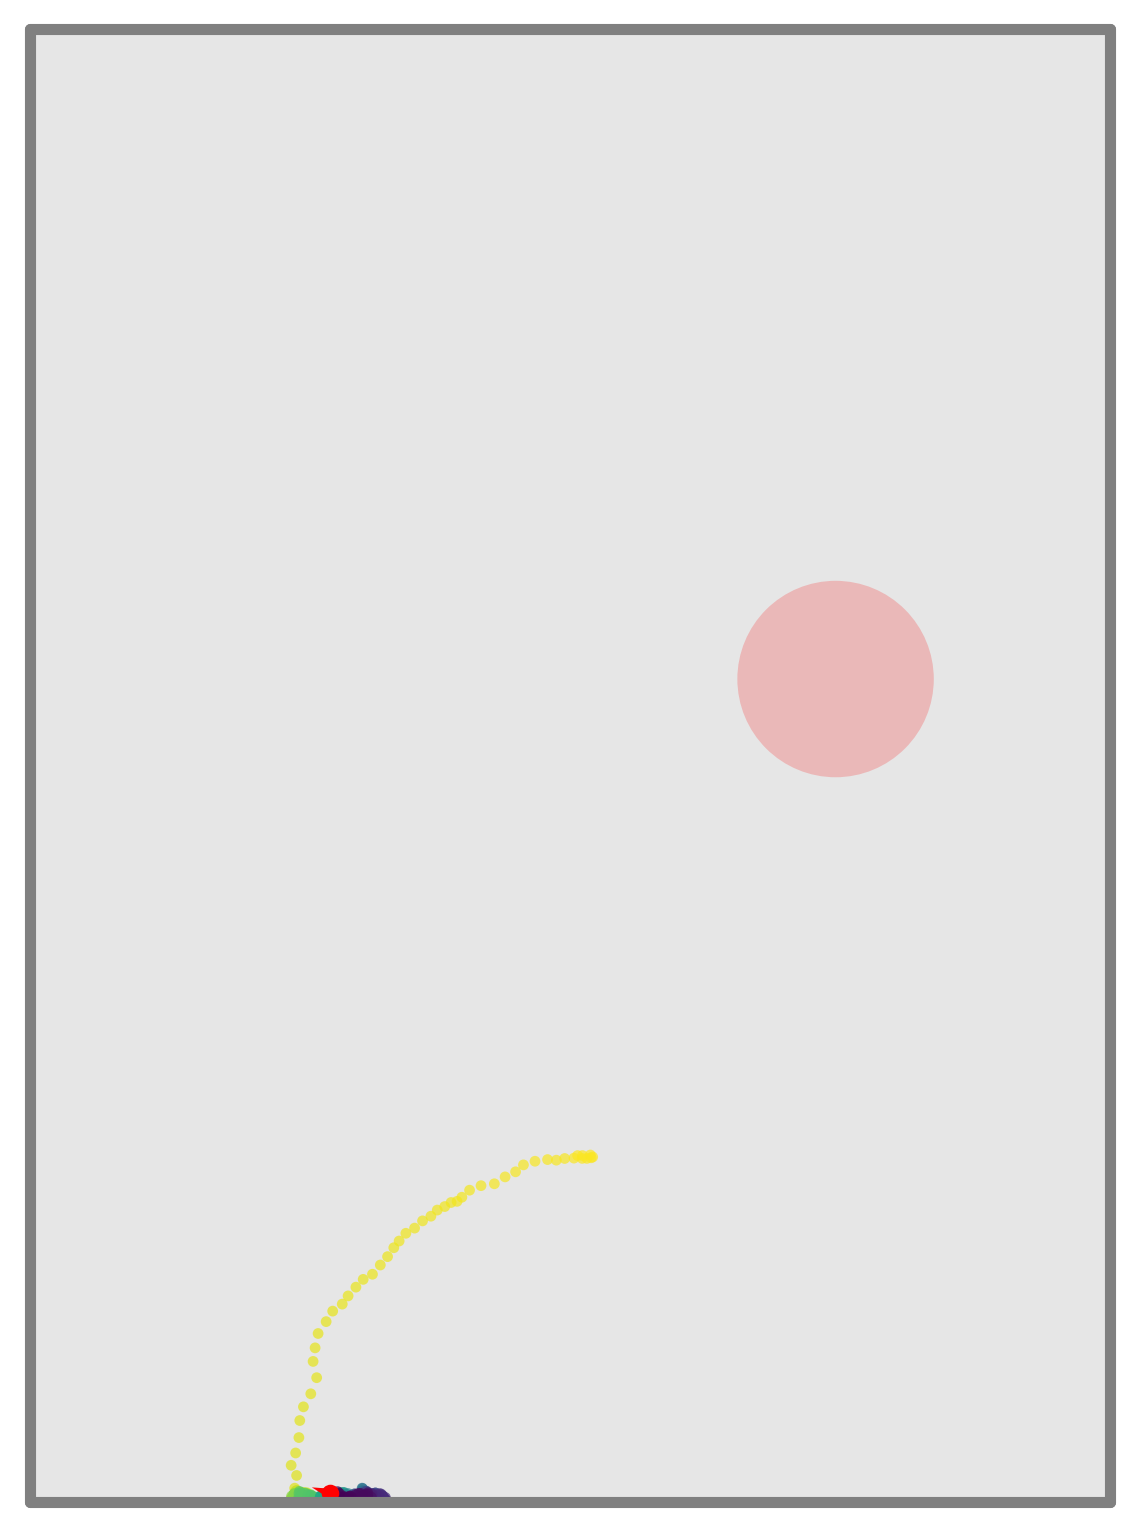

In [ ]:

#trial_controller.on_trial_ended_listeners.append(plot_cycles)
#trial_controller.run_trials_with_config(3, 2, 100)
trial_controller.run_trials_with_config(3, 2, 1000)
#trial_controller.run_trials_with_config(1, 1, 1000)

In [ ]:

#trial_controller.on_trial_ended_listeners.append(plot_cycles)
#trial_controller.run_trials_with_config(3, 2, 100)
#trial_controller.run_trials_with_config(1, 1, 100)
trial_controller.run_trials_with_config(3, 3, 1400)

In [ ]:
#trial_controller.run_trials_with_config(4, 2, 1000/5)

In [ ]:

trial_controller.run_trials_with_config(4, 4,2000)

In [ ]:
    layers = []

    populator = CellPopulator(self.agent, environment_size, cell_creator)

    desired_layers = [(0.04, 32),(0.12, 16), (0.56, 4), ]
    desired_layers = [(0.05, 32), (0.12, 20) ]
    #desired_layers = [(0.04, 28),  ]

    for param in desired_layers:#[(0.12, 16), (0.56, 4), (0.24, 16)]:#,(0.3, 8)]:
      print("Creating layer ", param)
      cells = populator.create_cells_from_width_and_columns(param[0], param[1])
      layers.append(NeuralLayer(cells, param[1]))

#trial_controller.run_trials_with_config(10, 1, 900)

In [ ]:
trial_controller.run_trials_with_config(3, 1, int(100/5))

In [ ]:

#trial_controller = TrialController(1, 1)
#trial_controller.run_trials_for_random_positions(900,)
#trial_controller.reset_for_next_trial()
#trial_controller.start_trial()
#trial_controller.agent.pos = np.array([0.5, 1.5])
#trial_controller.run_trial(1000, 12)
fig, ax = display_agent_series(trial_controller.agent, trial_controller.random_goal_positions,
                               reward_radius = 0.1)

columns = 16
rows = int(columns * (trial_controller.get_environment_size()[1]/trial_controller.get_environment_size()[0]))

n = rows * columns

for j in range(1):
  for i in range(n):
    position = np.array([0.1 + (i % columns) * trial_controller.get_environment_size()[0] / columns,
                        0.1 + trial_controller.get_environment_size()[1] / rows  * (i//columns)])

    vector = trial_controller.network_computations.action_selection.sample_action(12,
                                                                                  [False for i in range(8)] if True else
                                                                                  trial_controller.network_computations.get_impossible_actions(position, trial_controller.env))
    #vector
    # Draw the arrow
    ax.arrow(position[0], position[1], vector[0][0]* 0.1, vector[0][1]* 0.1,
            head_width=0.04, head_length=0.06, fc='blue', ec='blue')


In [ ]:
import datetime

from itertools import permutations

def cell_creator(agent, params):
  #return GridCells(agent, params)
  return GaussianRadialBasisPlaceCells(agent, params=params)

def generate_permutation_set(m, Nm):
    """
    Generate a set of Nm permutations of m elements.
    Each permutation is chosen uniformly from all possible permutations of m elements.
    """
    elements = list(range(m))
    all_permutations = list(permutations(elements))
    chosen_permutations = np.random.choice(len(all_permutations), size=Nm, replace=True)
    return [all_permutations[i] for i in chosen_permutations]

def get_next_starting_position_index(trial_n, m, permutation_set):
    """
    Compute the starting position index for trial_n based on the given permutation set.

    Parameters:
    - trial_n (int): The current trial number.
    - m (int): The number of elements in each permutation.
    - permutation_set (list): A list of permutations (σi).

    Returns:
    - int: The starting position index for trial_n.
    """
    n_div_m = trial_n // m
    n_mod_m = trial_n % m
    return permutation_set[n_div_m][n_mod_m]

def calculate_overlap_percentage(positions):
    """
    Calculates the percentage of non-unique positions in a list of 2D NumPy arrays.

    Parameters:
        positions (list of np.ndarray): A list of 2D positions as NumPy arrays.

    Returns:
        float: Percentage of non-unique positions (0 to 100).
    """
    # Convert positions to a list of tuples for hashing
    position_tuples = [tuple(pos) for pos in positions]

    # Count occurrences of each position
    unique, counts = np.unique(position_tuples, axis=0, return_counts=True)

    # Number of non-unique positions
    non_unique_count = sum(count for count in counts if count > 1)

    # Total positions
    total_positions = len(position_tuples)

    # Calculate percentage of non-unique positions
    if total_positions == 0:
        return 0.0  # Avoid division by zero
    overlap_percentage = (non_unique_count / total_positions) * 100

    return overlap_percentage


class TrialController:

  def __init__(self, trial_random_positions, trial_repetitions):

    self.network_computations = None
    self.env = None
    self.agent = None
    self.rewards = []
    self.random_goal_positions = []

    self.trial_number = 0
    self.trial_repetitions = trial_repetitions # N, number of times the same position should be usd
    self.trial_random_positions = trial_random_positions # m


    self.repetition_pos_map = [] # for every iteration, keeps a list of the list of positions of that agent
    self.suceeded_list = []
    self.number_of_steps_list = []
    self.action_chosen_historic = {} # for a pair (x,y) it stores the list of actions chosen (note how it has no time information)
    self.position_time_mapping = {}

    self.goal_radius = 0.1
    self.goal_radius_start = self.goal_radius
    self.goal_radius_end = None # Can be set tp determinate a radius that will be used to change goal_radius for each series of trials
    self.goal_radius_decay = None # if goal_radius_start is defined, this decay will be used to lower it every end of trial until it arrives at goal_radius
    self.initial_y = 0
    self.final_y = 3.0
    self.initial_x = 0
    self.final_x =  2.2

    self.on_trial_ended_listeners = []


    # CUSTOM VARIABLES
    self.invert_weights = True # keep as false for default behaviour

  def get_environment_size(self):


    environment_size = np.array([self.final_x - self.initial_x, self.final_y - self.initial_y])
    return environment_size

  def set_trials_radius(self, goal_radius_end, goal_radius_decay):
    self.goal_radius_end = goal_radius_end
    self.goal_radius_decay = goal_radius_decay

  def set_goal_radius(self, goal_radius):
    self.goal_radius = goal_radius
    self.goal_radius_start = None

  # Creates a new model (weights are reset too)
  # Run this once per trial
  def start_trial(self, number_of_rewards=1):

    #number_of_cells =  int(10*(environment_size[0]-0.1) * 10*(environment_size[1]-0.1))
    environment_size = self.get_environment_size()

    self.random_goal_positions = generate_random_positions(
        number_of_rewards, self.initial_x + self.goal_radius, self.initial_y+self.goal_radius, self.final_x-self.goal_radius, self.final_y-self.goal_radius)
    random_goals = []
    for position in self.random_goal_positions:
        random_goals.append([[position[0], position[1]],
                           self.goal_radius
                            ])

    self.env = create_environment(self.initial_x, self.final_x, self.initial_y, self.final_y, random_goals)

    self.agent = Agent(self.env,params={'dt':DT})
    self.env.add_agents(self.agent)
    self.env.reset()

    layers = []

    populator = CellPopulator(self.agent, environment_size, cell_creator)

    desired_layers = [(0.04, 32),(0.12, 16), (0.56, 4), ]
    desired_layers = [(0.05, 32), (0.12, 20) ]
    #desired_layers = [(0.04, 28),  ]

    for param in desired_layers:#[(0.12, 16), (0.56, 4), (0.24, 16)]:#,(0.3, 8)]:
      print("Creating layer ", param)
      cells = populator.create_cells_from_width_and_columns(param[0], param[1])
      layers.append(NeuralLayer(cells, param[1]))

    self.network_computations = NetworkComputations(layers, 0.08*5)


    self.rewards = []

  def run_trials_with_config(self, trial_random_positions, trial_repetitions, iterations):
    self.trial_repetitions = trial_repetitions
    self.trial_random_positions = trial_random_positions
    self.run_trials_for_random_positions(iterations)

  def run_trials_for_random_positions(self, iterations, number_of_random_positions=None):

    random_positions = []

    while len(random_positions) < self.trial_random_positions:
      random_position = generate_random_positions(1,self.initial_x + 0.2,
                                                  self.initial_y + 0.2, self.final_x - 0.2,
                                                  self.final_y - 0.2)[0]
      if random_position not in random_positions:

        if self.check_if_position_is_in_rewards(random_position, 0.2):
          continue

        random_positions.append(random_position)
      else:
        print("generated repeated position, ignoring")


    self.run_trials(iterations, random_positions)


  def run_trials_untill_success(self, iterations):

    suceeded = False
    number_of_trials = 0

    while not suceeded:
      number_of_trials += 1
      print("Running trial:", number_of_trials)
      random_position = generate_random_positions(1,
                                                  self.initial_x + 0.2,
                                                  self.initial_y + 0.2, self.final_x - 0.2,
                                                  self.final_y - 0.2)[0]
      self.agent.pos = np.array(random_position)
      self.env.reset()

      for layer in self.network_computations.layers:
        layer.reset_traces()

      self.network_computations.action_selection.reset_actions()

      suceeded = self.run_trial(iterations, number_of_trials)

  # Reruns the same trial for all given positions
  def run_trials(self, iterations, random_positions):

    number_of_trials = self.trial_repetitions * len(random_positions)
    permutation_set = generate_permutation_set(len(random_positions), self.trial_repetitions)
    got_rewarded_in_any_trial = False

    for i in range(number_of_trials):
      print("Running trial:", i)
      if i % self.trial_repetitions == 0:
        permutation_set = generate_permutation_set(len(random_positions), self.trial_repetitions)

      next_position_index = get_next_starting_position_index(i, len(random_positions), permutation_set) # i % len(random_positions)
      random_position = random_positions[next_position_index]
      self.agent.pos = np.array(random_position)
      self.env.reset()

      a = datetime.datetime.now()
      suceeded, iterations_required = self.run_trial(iterations, i if got_rewarded_in_any_trial else 0)

      if suceeded:
        got_rewarded_in_any_trial = True

      self.number_of_steps_list.append(iterations_required)

      b = datetime.datetime.now()

      if self.goal_radius_end != None:
        self.goal_radius = self.goal_radius + (self.goal_radius_decay)
        if self.goal_radius_decay > 0:
          self.goal_radius = min(self.goal_radius, self.goal_radius_end)
        else:
          self.goal_radius = max(self.goal_radius, self.goal_radius_end)

      c = b - a
      print("Suceeded?", suceeded)
      print("Time Taken for iteration:", int(c.total_seconds() * 1000))
      self.display_results()
      self.agent.reset_history()
      self.suceeded_list.append(suceeded)
      for listener in self.on_trial_ended_listeners:
        listener()
      self.reset_for_next_trial()
      self.position_time_mapping = {}

      if self.invert_weights:
        self.network_computations.invert_weights()

  def reset_for_next_trial(self):
    for layer in self.network_computations.layers:
      layer.reset_traces()

    self.network_computations.action_selection.reset_actions()

  def display_results(self):
    display_agent_series(self.agent, self.random_goal_positions, reward_radius=self.goal_radius)

  def check_if_position_is_in_rewards(self, position, additional_radius=0.0):
    for reward_position in self.random_goal_positions:
      distance = np.linalg.norm(np.array(reward_position) - position)
      if distance <= self.goal_radius + additional_radius:
        return True
    return False

  # runs the trial untill all rewards are found
  def run_trial(self, iterations, trial_number):

    reward = 0
    self.network_computations.action_selection.set_trial_bias(trial_number)
    index_of_last_action = 0
    for i in range(iterations):
      position = self.agent.pos

      position_array  = ("{:.2f}".format(position[0]), "{:.2f}".format(position[1]))

      if position_array not in self.position_time_mapping:
        self.position_time_mapping[position_array] = []

      self.position_time_mapping[position_array].append(i)

      actions = self.network_computations.iterate(self.env, position, reward, i, trial_number, reward == 1, index_of_last_action)
      if reward == 1:
        return True, i

      index_of_last_action = len(actions) - 1
      for i, action in enumerate(actions):
        #print("action", action)
        drift_velocity = {
          self.agent: np.array(
              self.network_computations.action_selection.get_action_vector(action))
        }

        summarized_position = [round(position[0], 2),round(position[1], 2)]

        if (summarized_position[0], summarized_position[1]) not in self.action_chosen_historic:
          self.action_chosen_historic[(summarized_position[0], summarized_position[1])] = []
        self.action_chosen_historic[(summarized_position[0], summarized_position[1])].append(action)
        observation, reward, terminate_episode, _, info = self.env.step(drift_velocity, dt=DT)

        reward = reward['agent_0']
        position = self.agent.pos
        if self.check_if_position_is_in_rewards(position):
          reward = 1
          index_of_last_action = i
          break
      #else:
      #  reward = -0.5 * i/iterations


      #self.rewards.append(reward)
    #self.network_computations.iterate(self.env, self.agent.pos, -0.5, iterations+1, trial_number, reward == 1, index_of_last_action)
    return False, iterations

In [ ]:

trial_controller.agent.plot_trajectory(color="changing")

In [ ]:
trial_controller.network_computations.layers[1].place_cells.plot_rate_map(
    #method="history",
    chosen_neurons=[2],
)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(trial_controller.suceeded_list, marker='o', linestyle='-', color='b')  # Line graph with markers

#plt.plot([
#        np.sum(np.array(trial_controller.suceeded_list[i*trial_controller.trial_random_positions:(i+1)*trial_controller.trial_random_positions - 1]))
#        for i in range(trial_controller.trial_repetitions)
#], marker='o', linestyle='-', color='b')  # Line graph with markers

#plt.plot(trial_controller.network_computations.history["error"], marker='o', linestyle='-', color='b')  # Line graph with markers
#plt.plot(trial_controller.network_computations.history["was_optimal"], marker='o', linestyle='-', color='b')  # Line graph with markers

plt.grid(True)
plt.show()

In [ ]:
trial_controller.number_of_steps_list

In [ ]:
plt.plot(trial_controller.number_of_steps_list, marker='o', linestyle='-', color='b')  # Line graph with markers


In [ ]:
trial_controller.network_computations.layers[0].place_cells.plot_place_cell_locations()

In [ ]:

def illustrate_weights(array, rows):
    """
    Create a weight illustration of a given array.

    Args:
        array (list or np.ndarray): The input array to illustrate.
        rows (int): The number of rows in the weight illustration grid.
    """
    # Ensure the input array is a numpy array
    array = np.array(array)

    # Calculate the number of columns
    cols = int(np.ceil(len(array) / rows))

    # Pad the array with NaN to fit the grid
    padded_array = np.full(rows * cols, np.nan)
    padded_array[:len(array)] = array

    # Reshape into the grid
    weight_grid = padded_array.reshape(rows, cols)

    # Plot the weight illustration
    plt.figure(figsize=(8, 6))
    cmap = plt.get_cmap('viridis')  # Use a perceptually uniform colormap
    plt.imshow(weight_grid, cmap=cmap, aspect='auto', interpolation='nearest')
    plt.colorbar(label='Weight Value')
    plt.title('Weight Illustration')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

for layer in trial_controller.network_computations.layers:
  weights = layer.weights_for_state

  illustrate_weights(weights, layer.rows)

In [ ]:


weights = trial_controller.network_computations.layers[0].weights_for_action

weights = [np.sum(weight) for weight in weights]
row_size = 32

illustrate_weights(weights, row_size)

In [ ]:


weights = trial_controller.network_computations.layers[0].weights_for_action

weights = [np.argmax(weight) for weight in weights]
row_size = 32

illustrate_weights(weights, row_size)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def filter_close_positions(position_vectors, proximity_threshold=0.5):
    """
    Filters out positions (keys) in a dictionary that are too close to each other.

    Args:
        position_vectors (dict): A dictionary where keys are 2D positions (tuples),
                                 and values are lists of vectors in Cartesian coordinates [(x, y), ...].
        proximity_threshold (float): Minimum distance between positions to keep them.

    Returns:
        dict: Filtered dictionary of position_vectors.
    """
    filtered_positions = {}
    for position, vectors in position_vectors.items():
        if all(np.linalg.norm(np.array(position) - np.array(existing)) >= proximity_threshold
               for existing in filtered_positions):
            filtered_positions[position] = vectors
    return filtered_positions

def draw_preferable_directions(position_vectors, ax=None, max_length=1.0, proximity_threshold=0.5,
                               method_by_summing=False):
    """
    Visualize the most preferable direction in a 2D space, ignoring positions that are too close.

    Args:
        position_vectors (dict): A dictionary where keys are 2D positions (tuples),
                                 and values are lists of vectors in Cartesian coordinates [(x, y), ...].
        ax (matplotlib.axes.Axes, optional): An Axes object for plotting. Creates one if None.
        max_length (float, optional): Maximum length to scale the resulting vectors. Default is 1.0.
        proximity_threshold (float, optional): Minimum distance between positions to keep them.
    """
    # Filter out positions that are too close
    if proximity_threshold is not None:
      position_vectors = filter_close_positions(position_vectors, proximity_threshold)

    # Create an Axes object if not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))

    # Iterate through positions and their vector lists
    for (x, y), vectors in position_vectors.items():

        if method_by_summing:
          # Sum the vectors
          summed_vector = np.sum(vectors, axis=0)

          # Normalize the summed vector
          norm = np.linalg.norm(summed_vector)
          if norm != 0:
              normalized_vector = summed_vector / norm
              scaled_vector = normalized_vector * min(norm, max_length)  # Scale to max_length
          else:
              scaled_vector = (0, 0)
        else:
          unique_vectors, counts = np.unique(vectors, axis=0, return_counts=True)

          # Find the index of the most frequent vector
          most_common_index = np.argmax(counts)

          # Get the most common vector
          most_common_vector = unique_vectors[most_common_index]

          scaled_vector = most_common_vector

        # Draw the scaled vector at the given position
        ax.quiver(
            x, y, scaled_vector[0], scaled_vector[1],
            angles='xy', scale_units='xy', scale=1, color='blue', width=0.005
        )

    # Plot settings
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.axvline(0, color='gray', linewidth=0.5)
    ax.grid(color='lightgray', linestyle='--', linewidth=0.5)
    ax.set_aspect('equal', adjustable='box')
    ax.set_title('Most Preferable Directions in 2D Space')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Show the plot only if no Axes object was passed
    if ax is None:
        plt.show()



fig, ax = trial_controller.env.plot_environment()

# Example usage
position_vectors = {
    (0, 0): [(1, 0), (2, 2), (1, 1)],    # Vectors at (0, 0)
    (1, 1): [(-3, 0), (-2, -2)],         # Vectors at (1, 1)
    (2, 0): [(1, 2), (1, -2)],           # Vectors at (2, 0)
}

position_vectors = trial_controller.action_chosen_historic

to_vector = {}

for position, actions in position_vectors.items():
  to_vector[position] = []

  for action in actions:
    to_vector[position].append(trial_controller.network_computations.action_selection.get_action_vector(action))

position_vectors = to_vector

# increase proximity threshold to have less detail
# setting it to None makes you see the real action historic, but its not readable
# 0.1 is a good value, specially for an illustration after the model has learnt to find the reward
# 0.05 is almost always too much, 0.2 is too little detail
# if you need more detail than 0.1, consider 0.08 first, and only then smaller values
# remember: this isnt generating actions, simply showing the historic of
# actions, with no time relation.

draw_preferable_directions(position_vectors, ax=ax, max_length=0.1,proximity_threshold=0.07)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = trial_controller.env.plot_environment()

draw_preferable_directions(position_vectors, ax=ax, max_length=0.13,proximity_threshold=0.12,
                           method_by_summing=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def draw_preferable_directions(position_vectors):
    """
    Visualize the most preferable direction in a 2D space.

    Args:
        position_vectors (dict): A dictionary where keys are 2D positions (tuples),
                                 and values are lists of vectors in Cartesian coordinates [(x, y), ...].
    """
    # Initialize the plot
    plt.figure(figsize=(8, 8))

    # Iterate through positions and their vector lists
    for (x, y), vectors in position_vectors.items():
        # Sum the vectors
        summed_vector = np.sum(vectors, axis=0)

        # Normalize the summed vector
        norm = np.linalg.norm(summed_vector)
        normalized_vector = summed_vector / norm if norm != 0 else (0, 0)

        # Draw the normalized vector at the given position
        plt.quiver(
            x, y, normalized_vector[0], normalized_vector[1],
            angles='xy', scale_units='xy', scale=1, color='blue', width=0.005
        )

    # Plot settings
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('Most Preferable Directions in 2D Space')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# Example usage
position_vectors = {
    (0, 0): [(1, 0), (2, 2), (1, 1)],    # Vectors at (0, 0)
    (1, 1): [(-3, 0), (-2, -2)],         # Vectors at (1, 1)
    (2, 0): [(1, 2), (1, -2)],           # Vectors at (2, 0)
}

position_vectors = trial_controller.action_chosen_historic

draw_preferable_directions(position_vectors)


In [ ]:
trial_controller.network_computations.layers[0].place_cells.plot_place_cell_locations(show_widths=True)

In [ ]:
plot_cycles()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator

def plot_cycles():
  repeated_positions = []

  for position in trial_controller.position_time_mapping.keys():
    list_of_occurances = trial_controller.position_time_mapping[position]
    if len(list_of_occurances) > 1:
      repeated_positions.append(list_of_occurances)


  number_of_repetitions = [0 for i in range(4)]

  #repeated_positions = [[0,2]]
  for position in repeated_positions:

    for i, index in enumerate(position[0: -1]):

      next_index = position[i + 1]

      repetition_v = next_index - index
      repetition_v -= 2
      if repetition_v < len(number_of_repetitions) and repetition_v >= 0:
        number_of_repetitions[repetition_v] += 1


  plt.figure(figsize=(8, 5))
  ax = sns.barplot(x=[2 + i for i in range(len(number_of_repetitions))],y=number_of_repetitions)
  plt.title('Quantidade de ciclos por n-diferença')
  plt.grid(True)

  ax.yaxis.set_major_locator(MaxNLocator(integer=True))

  ax.figure.show()

In [ ]:
trial_controller.display_results()

In [ ]:
#anim1 = trial_controller.agent.animate_trajectory(
#    t_start=trial_controller.agent.episode_data["start_time"][-1] + trial_controller.agent.dt,
#    t_end=trial_controller.agent.history["t"][-1],
#    speed_up=5,
#)

Caso com 2000 iterações

### Trials

In [ ]:

trial_repetitions = 10
trial_random_positions = 10

number_of_trials = trial_repetitions * trial_random_positions



## (off) Sugestão de Melhoria Para o Artigo


### Bias de visão


O artigo atualmente utiliza o conceito de 'bias' para garantir um comportamento exploratório inicial, que durante os trials diminui sua relevância. A intenção é evitar que o animal fique preso em loops. O bias é fixo e independente de ambiente.

Minha sugestão é uma heurística baseada na visão do animal, que consdiera dois fatores:

1. Caminhos abertos: Evitar o caminho onde a parede esteja MAIS próxima possível do agente;
2. Objetos vísiveis: A visão contaria como um bias em direção a objetos, como por exemplo a recompensa. Nota-se que essa abordagem não seria equivalente a aumentar o alcance da recompensa, e que invés disso o elemento "recompensa" seria identificado como um elemento distinto de paredes, mas ainda não identificado. Nesse sentido, ir em direção ao objeto teria um objetivo de exploração.  

https://colab.research.google.com/github/RatInABox-Lab/RatInABox/blob/main/demos/vector_cell_demo.ipynb

In [ ]:

plus_boundary = [
    [0.4, 0], [0.6, 0],   # Bottom horizontal
    [0.6, -0.4], [0.75, -0.4], [0.75, -0.6], [0.6, -0.6],  # Right vertical
    [0.6, -1.0], [0.4, -1.0], [0.4, -0.6], [0.0, -0.6],  # Top horizontal
    [0.0, -0.4], [0.4, -0.4], [0.4, 0]  # Left vertical closing the shape
]

Env = Environment(params={
    'boundary':plus_boundary,
    })
#Env.add_object(object=[0,0],type=0)
#Env.add_object(object

Env.add_object(object=[0.5,-0.6] ,type=0)
Env.plot_environment(plot_objects=True)
#agent.plot_trajectory(color="changing", colorbar=True)


In [ ]:
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent

plus_boundary = [
    [0.4, 0], [0.6, 0],   # Bottom horizontal
    [0.6, -0.4], [0.75, -0.4], [0.75, -0.6], [0.6, -0.6],  # Right vertical
    [0.6, -1.0], [0.4, -1.0], [0.4, -0.6], [0.0, -0.6],  # Top horizontal
    [0.0, -0.4], [0.4, -0.4], [0.4, 0]  # Left vertical closing the shape
]

Env = Environment(params={
    'boundary':plus_boundary,
    })
#Env.add_object(object=[0,0],type=0)
#Env.add_object(object

Env.add_object(object=[0.5,-0.6] ,type=0)
Env.add_object(object=[0.65,-0.5] ,type=1)
Env.plot_environment(plot_objects=True)
#agent.plot_trajectory(color="changing", colorbar=True)


In [ ]:

plus_boundary = [
    [0.4, 0], [0.6, 0],   # Top horizontal
    [0.6, -0.4], [0.7, -0.4], [0.7, -0.2], [0.9, -0.2],  [0.9, -0.6], [0.6, -0.6],  # Right vertical
    [0.6, -1.0], [0.4, -1.0], [0.4, -0.6], [0.0, -0.6],  # Bottom horizontal
    [0.0, -0.4], [0.4, -0.4], [0.4, 0]  # Left vertical closing the shape
]

Env = Environment(params={
    'boundary':plus_boundary,
    })
#Env.add_object(object=[0,0],type=0)
#Env.add_object(object

Env.add_object(object=[0.5,-0.6] ,type=0)
Env.add_object(object=[0.8,-0.25] ,type=1)
Env.plot_environment(plot_objects=True)
#agent.plot_trajectory(color="changing", colorbar=True)


# 🟡 Step 2: Camada Customizada Usando Transformações Espaciais


Baseado no Artigo: "Modeling the grid cell activity based on cognitive space
transformation"



In [ ]:


# Install dependencies
!pip install ratinabox gymnasium torch pettingzoo #dependencies

#Import ratinabox
import ratinabox
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
from ratinabox.Neurons import Neurons, GridCells, HeadDirectionCells, FeedForwardLayer, PlaceCells

#stylize plots and set figure directory for saving
ratinabox.stylize_plots(); ratinabox.autosave_plots=True; ratinabox.figure_directory="../figures/"

#...and other dependencies
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ratinabox.contribs.TaskEnvironment import (SpatialGoalEnvironment, SpatialGoal, Reward)
import torch
import torch.nn as nn
import random
import math

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 847.8/847.8 kB 35.2 MB/s eta 0:00:00


In [ ]:


import numpy as np


# Eq. 1, Eq. 2 and Eq. 3 are all about calculating a next position from a given velocity, which is already extensively modeled by rat in a box

# Eq. 4: containing spacing,orientation, phase_one, phase_two to represent a grid cell
# Contains all features that a grid cell has,
# The class GridCell of RatInABox already has all of these features in lists, for a group of cells
def get_representation(spacing, orientation, phase_one, phase_two):

    # Eq. 13, which will be used in Eq. 12
    transformation_matrix = np.array([
        [spacing * np.cos(orientation), spacing * np.cos(orientation + np.pi / 3)],
        [spacing * np.sin(orientation), spacing * np.sin(orientation + np.pi / 3)]
    ])
    #return transformation_matrix
    # Inverts transformation matrix
    transformation_matrix_inv = np.linalg.inv(transformation_matrix)

    return transformation_matrix_inv

''' # if a separate class was wanted
class GridCellFeatures:

  def __init__(self, spacing, orientation, phase_one, phase_two):
    self.spacing = spacing
    self.orientation = orientation # from 0 to pi/3
    self.phase_one = phase_one # from 0 to 2 * pi
    self.phase_two = phase_two # from 0 to 2 * pi
    self.representation = None

  def get_representation(self):

    if self.representation == None:
      self.representation = get_representation(self.spacing, self.orientation, self.phase_one, self.phase_two)

    return transformation_matrix_inv
'''

# Eq.5, This represents the resulting reaction of a grid cell towards an object in space
class ElementCognitiveRepresentation:

  def __init__(self,x,y,firing):
    self.x = x
    self.y = y
    self.firing = firing


# Eq. 11
# s_i -> spacing
# theta_i -> orientation of the grid cell
# grid_phases -> np.array representing animal position
# global_position -> np.array representing animal position
def get_grid_position_from_global_position(s_i, theta_i, grid_phases, global_position):

    # Calculate the final vector
    result_vector = np.dot(transformation_matrix_inv, global_position - grid_phases)

    return result_vector

In [ ]:

import math

# Eq.14 is a summarization of Eq.12, where Eq. 12 is itself a summarization of Eq. 9, 10 and 11

# todo: check if spacing and gridscales is the same thing

class SpaceTransformedGridCells(GridCells):


    def __init__(self, Agent, params={}):
      super().__init__(Agent, params)

      self.transformations = []

      self.bump_size = 3.5#3 # in a single example it uses k=3, have to check later
      self.threshold = 0.35 # in a single example it uses =0.4, have to check later


      for i in range(self.n):
        self.transformations.append(get_representation(self.gridscales[i], self.orientation[i], self.phase_offsets[i][0], self.phase_offsets[i][1]))


    def get_state(self, evaluate_at="agent", **kwargs):


      if evaluate_at == "agent":
            pos = self.Agent.pos
      elif evaluate_at == "all":
            pos = self.Agent.Environment.flattened_discrete_coords
      else:
            pos = kwargs["pos"]

      position = np.array(pos)
      position = position.reshape(-1, position.shape[-1])

      rates = []

      for i in range(self.n):

        #transformation_matrix = np.array([[self.transformations[i], position[1]], [0,1]])
        #transformed_position = np.array([])

        all_rates = []
        for j in range(position.shape[0]):

          t_matrix = np.array([[self.transformations[i][0][0],self.transformations[i][0][1], self.phase_offsets[i][0]],
                               [self.transformations[i][1][0],self.transformations[i][1][1], self.phase_offsets[i][1]],
                                [0,0, 1]])

          transformed_position = np.matmul(t_matrix, (np.array([position[j][0],position[j][1], 1])))

          #transformed_position = np.transpose(transformed_position)
          transformed_position = np.array([transformed_position[0], transformed_position[1]])
          #transformed_position = self.transformations[i] * position[j]  #- np.array([self.phase_offsets[i][0], self.phase_offsets[i][1]])

          t_position_difference = transformed_position - np.round(transformed_position)

          distance = np.dot(np.transpose(t_position_difference),t_position_difference )#np.transpose(t_position_difference) * t_position_difference
          distance = abs(distance)
          firing = math.atan(self.bump_size * ((distance/self.gridscales[i]) - self.threshold))
          #if firing < 0.3:
          #  firing = 0
          all_rates.append(firing if firing >= 0 else 0)

        #transformed_position = self.transformations[i] * position #- np.array([self.phase_offsets[i][0], self.phase_offsets[i][1]])

        #t_position_difference = transformed_position - np.round(transformed_position)
        #distance = np.transpose(t_position_difference) * t_position_difference
        #firing = math.atan(bump_size * ((np.linalg.norm(distance)/self.gridscales[i]) - threshold))
        rates.append(all_rates)



      #rates = (   rates * (self.max_fr - self.min_fr) + self.min_fr       )  # scales from being between [0,1] to [min_fr, max_fr]

      return rates



In [ ]:

'''GridCells(agent, params={
    "n": 1
}).get_state(evaluate_at="all")'''

'GridCells(agent, params={\n    "n": 1\n}).get_state(evaluate_at="all")'

In [ ]:


Env = Environment(params={
    'boundary':[
        [0,0 ],[0.2,0],[0.2,-1],
         [1,-1],[1,-0.8],[0.5,-0.8],[0.5,-0.6],
        [0.5,-0.2],[0.5,-0],[1.2,0],[1.2,-0.2],
         [0.7,-0.2],
         [0.7,-0.6],
     [1.2,-0.6],[1.2,-1.2],
      [1.0,-1.2],[0,-1.2]],
    })
Env = Environment(params={
    'boundary': [
        [0,0 ],[2,0],[2,-2],[0,-2]
    ]
    }
                  )
agent = Agent(Env)
cells = SpaceTransformedGridCells(agent, params={
    "n": 1,
    "gridscales":[1],
    "orientation":[np.pi/4],
    "phase_offsets":[[0.5,0.0]]
})


/usr/local/lib/python3.10/dist-packages/ratinabox/utils.py:823: UserWarning: Cannot collect the default_params dictionaries, as SpaceTransformedGridCells does not have the class attribute 'default_params' defined in its preamble. (Can be just an empty dictionary, i.e.: default_params = dict().)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ratinabox/utils.py:878: UserWarning: Cannot check the keys in the params dictionary, as <class '__main__.SpaceTransformedGridCells'> does not have a class attribute 'default_params' defined in its preamble. (Can be just an empty dictionary, i.e.: default_params = dict().)
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ratinabox/utils.py:823: UserWarning: Cannot collect the default_params dictionaries, as SpaceTransformedGridCells does not have the class attribute 'default_params' defined in its preamble. (Can be just an empty dictionary, i.e.: default_params = dict().)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ratinabox/utils.py:878: UserWarning: Cannot check the keys in the params dictionary, as <class '__main__.SpaceTransformedGridCells'> does not have a class attribute 'default_params' defined in its preamble. (Can be just an empty dictionary, i.e.: default_params = dict().)
  warnings.warn(


Figure saved to /figures/24_12_18/GridCells_ratemaps_0225.png  & .svg


(<Figure size 1000x1000 with 2 Axes>, array([<Axes: >], dtype=object))

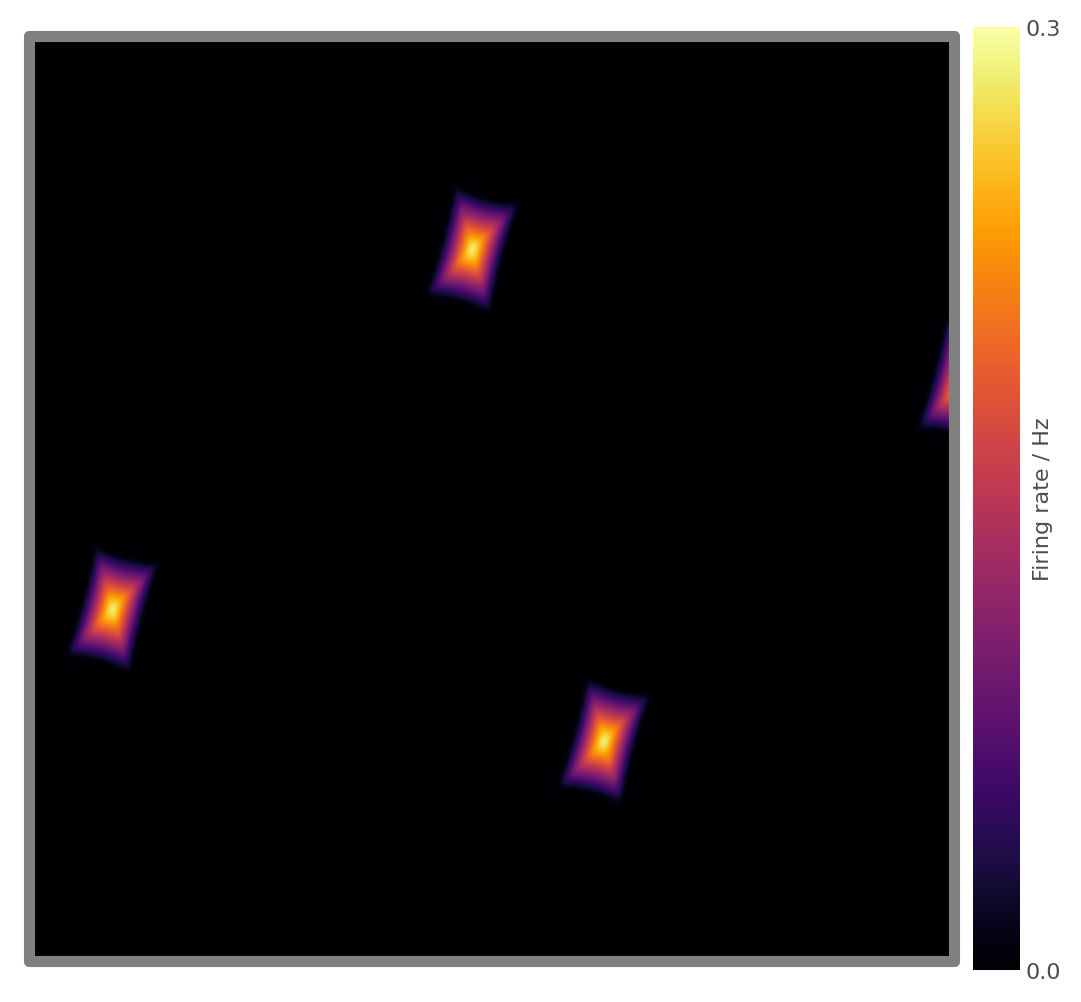

In [ ]:

cells = SpaceTransformedGridCells(agent, params={
    "n": 1,
    "gridscales":[1.1],
    "orientation":[np.pi/4],
    "phase_offsets":[[0.5,0.0]]
})
cells.plot_rate_map(method="groundtruth_headdirectionaveraged",colorbar=True)

In [ ]:
agent.Environment.flattened_discrete_coords

array([[ 0.005, -0.005],
       [ 0.015, -0.005],
       [ 0.025, -0.005],
       ...,
       [ 1.975, -1.995],
       [ 1.985, -1.995],
       [ 1.995, -1.995]])

In [ ]:


def convert_position_from_one_place_cell_frame_to_another(position, rotation_angle, translation_angle):

  t_matrix = (np.array([
      [math.cos(rotation_angle), -math.sin(rotation_angle)],
      [math.sin(rotation_angle), math.cos(rotation_angle)]
  ]))

# 🟣 Step 4: Organize Code for Contribution to RatInABox's codebase


## What will be added to RatInABox

Considering the applicabilities of these models, it makes sense for the classes that were developed for each article to be separated in individual files and given proper documentation.

Additionally, however, the two models that were integrated as one serve as an unique model that, by using knowledge from these two separate articles, will require a separate article where its effectiveness will be analysed further before being considered acceptable. With that in mind, this model will have a separate repository for the time being.

# Step 5: Comparação de Resultados Avançada

# Step 6: Publishing

Things to consider:

- Where to try: consider the articles you took, where they got published is a good start
- Make sure the point of advancement is clear;
- Make sure to reduce the bias and MAKE THE EXISTING BIAS AS TRANSPARENT AS POSSIBLE;
- Remember that after being accepted it will still take a fair ammount of time to get it published (and you are gonna have to work on feedback given);
